In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from config import gkey
import gmaps
from ipywidgets.embed import embed_minimal_html
import seaborn as sns
import plotly.express as px
import re
import gmaps.geojson_geometries
from matplotlib.cm import viridis
from matplotlib.cm import Spectral
from matplotlib.colors import to_hex
import country_converter as coco

# Data Pull

In [3]:
ultimate_no_null_df = pd.read_csv("ultimate_no_null.csv")
ultimate_no_null_df.head(-1)

standard_names  month  year  Confirmed  stringency_index        lat  \
0       Afghanistan      1  2020          0          0.000000  33.939110   
1       Afghanistan      2  2020          1          2.010690  33.939110   
2       Afghanistan      3  2020        174         40.831935  33.939110   
3       Afghanistan      4  2020       1952         80.740000  33.939110   
4       Afghanistan      5  2020      13081         84.260000  33.939110   
...             ...    ...   ...        ...               ...        ...   
2017       Zimbabwe      7  2020       2578         76.583548 -19.015438   
2018       Zimbabwe      8  2020       3328         80.560000 -19.015438   
2019       Zimbabwe      9  2020       1341         78.457667 -19.015438   
2020       Zimbabwe     10  2020        529         71.300000 -19.015438   
2021       Zimbabwe     11  2020       1583         69.257667 -19.015438   

            lng  Population (2020) Infection_rate ISO_2 ISO_3  
0     67.709953           39074280          0.00%    AF   AFG  
1     67.709953           39074280          0.00%    AF   AFG  
2     67.709953           39074280          0.00%    AF   AFG  
3     67.709953           39074280          0.01%    AF   AFG  
4     67.709953           39074280          0.03%    AF   AFG  
...         ...                ...            ...   ...   ...  
2017  29.154857           14899771          0.02%    ZW   ZWE  
2018  29.154857           14899771          0.02%    ZW   ZWE  
2019  29.154857           14899771          0.01%    ZW   ZWE  
2020  29.154857           14899771          0.00%    ZW   ZWE  
2021  29.154857           14899771          0.01%    ZW   ZWE  

[2022 rows x 11 columns]

In [4]:
ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"]=="Vanuatu"]

standard_names  month  year  Confirmed  stringency_index        lat  \
1952        Vanuatu      1  2020          0          0.000000 -15.376706   
1953        Vanuatu      2  2020          0          0.000000 -15.376706   
1954        Vanuatu      3  2020          0         16.128387 -15.376706   
1955        Vanuatu      4  2020          0         77.408000 -15.376706   
1956        Vanuatu      5  2020          0         72.762581 -15.376706   
1957        Vanuatu      6  2020          0         66.670000 -15.376706   
1958        Vanuatu      7  2020          0         66.670000 -15.376706   
1959        Vanuatu      8  2020          0         60.934516 -15.376706   
1960        Vanuatu      9  2020          0         22.220000 -15.376706   
1961        Vanuatu     10  2020          0         22.220000 -15.376706   
1962        Vanuatu     11  2020          1         27.502000 -15.376706   
1963        Vanuatu     12  2020          0         30.560000 -15.376706   

             lng  Population (2020) Infection_rate ISO_2 ISO_3  
1952  166.959158             308337          0.00%    VU   VUT  
1953  166.959158             308337          0.00%    VU   VUT  
1954  166.959158             308337          0.00%    VU   VUT  
1955  166.959158             308337          0.00%    VU   VUT  
1956  166.959158             308337          0.00%    VU   VUT  
1957  166.959158             308337          0.00%    VU   VUT  
1958  166.959158             308337          0.00%    VU   VUT  
1959  166.959158             308337          0.00%    VU   VUT  
1960  166.959158             308337          0.00%    VU   VUT  
1961  166.959158             308337          0.00%    VU   VUT  
1962  166.959158             308337          0.00%    VU   VUT  
1963  166.959158             308337          0.00%    VU   VUT

In [5]:
covid_stats_df =  pd.read_csv("covid_stats_2020.csv")
covid_stats_df.head()

standard_names ISO_2 ISO_3  Population (2020)        lat        lng  \
0    Afghanistan    AF   AFG           39074280  33.939110  67.709953   
1        Albania    AL   ALB            2877239  41.153332  20.168331   
2        Algeria    DZ   DZA           43984569  28.033886   1.659626   
3        Andorra    AD   AND              77287  42.506285   1.521801   
4         Angola    AO   AGO           33032075 -11.202692  17.873887   

   Confirmed  stringency_index  Infection_rate_f  
0      46274         42.700514              0.11  
1      52004         55.330056              1.81  
2      94371         59.981444              0.22  
3       7519         40.286864              9.72  
4      16562         57.541104              0.04

In [6]:
sample = pd.read_csv("samples.csv")
sample

standard_names ISO_2 ISO_3  Population (2020)        lat         lng  \
0       United States    US   USA          331341050  37.090240  -95.712891   
1               India    IN   IND         1382345085  20.593684   78.962880   
2              Brazil    BR   BRA          212821986 -14.235004  -51.925280   
3               China    CN   CHN         1440297825  35.861660  104.195397   
4              France    FR   FRA           65298930  46.227638    2.213749   
5              Russia    RU   RUS          145945524  61.524010  105.318756   
6               Spain    ES   ESP           46757980  40.463667   -3.749220   
7      United Kingdom    GB   GBR           67948282  55.378051   -3.435973   
8               Italy    IT   ITA           60446035  41.871940   12.567380   
9              Turkey    TR   TUR           84495243  38.963745   35.243322   
10            Nigeria    NG   NGA          206984347   9.081999    8.675277   
11         Uzbekistan    UZ   UZB           33551824  41.377491   64.585262   
12           Malaysia    MY   MYS           32436963   4.210484  101.975766   
13          Singapore    SG   SGP            5858322   1.352083  103.819836   
14              Ghana    GH   GHA           31181428   7.946527   -1.023194   
15            Albania    AL   ALB            2877239  41.153332   20.168331   
16         Luxembourg    LU   LUX             627704  49.815273    6.129583   
17        South Korea    KR   KOR           51276977  35.907757  127.766922   
18            Finland    FI   FIN            5542237  61.924110   25.748151   
19        Afghanistan    AF   AFG           39074280  33.939110   67.709953   
20           Barbados    BB   BRB             287437  13.193887  -59.543198   
21         Seychelles    SC   SYC              98453  -4.679574   55.491977   
22             Monaco    MC   MCO              39290  43.738418    7.424616   
23  Brunei Darussalam    BN   BRN             438202   4.535277  114.727669   
24           Dominica    DM   DMA              72017  15.414999  -61.370976   
25               Fiji    FJ   FJI             897573 -17.713371  178.065032   
26               Laos    LA   LAO            7293542  19.856270  102.495496   
27        Timor-Leste    TL   TLS            1322667  -8.874217  125.727539   
28    Solomon Islands    SB   SLB             689671  -9.645710  160.156194   
29            Vanuatu    VU   VUT             308337 -15.376706  166.959158   

    Confirmed  stringency_index  Infection_rate_f  
0    17459296         56.045880              5.27  
1     9462809         62.869497              0.68  
2     7162978         56.761687              3.37  
3     6665209         68.391841              0.46  
4     5352449         55.223795              8.21  
5     2764843         50.600998              1.91  
6     2246032         55.975557              4.81  
7     2173896         56.888553              3.20  
8     2159937         58.364239              3.58  
9     1982090         53.585087              2.36  
10      77013         53.885979              0.03  
11      75675         50.968375              0.22  
12      65697         52.726719              0.21  
13      58386         49.634418              0.98  
14      53653         41.623758              0.18  
15      52004         55.330056              1.81  
16      51656         43.160278              8.22  
17      48570         47.322044              0.10  
18      47179         36.915609              0.85  
19      46274         42.700514              0.11  
20        307         45.059213              0.10  
21        202         33.860586              0.20  
22        154         54.186199              0.39  
23        152         38.282705              0.03  
24         88         35.822549              0.12  
25         46         51.240738              0.00  
26         41         34.867858              0.00  
27         31         31.385059              0.00  
28         17         31.102298              0.00

In [7]:
covid_stats_sorted_df = pd.read_csv("covid_stats_sorted.csv")
covid_stats_sorted_df.head()

standard_names ISO_2 ISO_3  Population (2020)        lat         lng  \
0  United States    US   USA          331341050  37.090240  -95.712891   
1          India    IN   IND         1382345085  20.593684   78.962880   
2         Brazil    BR   BRA          212821986 -14.235004  -51.925280   
3          China    CN   CHN         1440297825  35.861660  104.195397   
4         France    FR   FRA           65298930  46.227638    2.213749   

   Confirmed  stringency_index  Infection_rate_f  
0   17459296         56.045880              5.27  
1    9462809         62.869497              0.68  
2    7162978         56.761687              3.37  
3    6665209         68.391841              0.46  
4    5352449         55.223795              8.21

# Heatmap by gmaps

In [8]:
# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = covid_stats_df[["lat", "lng"]]

# Store Confirmed in Confirmed series
confirmed = covid_stats_df["Confirmed"].astype(float)

# Calculating the max Confirmed for heatmap
max_infection = confirmed.max()

In [9]:
# Plot Heatmap
fig = gmaps.figure()

info_box_template = """
<dl>
<dt>Name</dt><dd>{standard_names}</dd>
<dt>Confirmed</dt><dd>{Confirmed}</dd>
<dt>Population</dt><dd>{Population (2020)}</dd>
<dt>Infection rate</dt><dd>{Infection_rate_f}</dd>
</dl>
"""
sample_info = [info_box_template.format(**row) for index, row in sample.iterrows()]
sample_locations = sample[["lat", "lng"]]
markers = gmaps.marker_layer(sample_locations, info_box_content = sample_info)

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations, weights=confirmed, max_intensity=1000000,
                                    point_radius=5.0, dissipating = False)

# Add layer
fig.add_layer(heatmap_layer)
fig.add_layer(markers)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
# Export the map in an interactive HTML file
# embed_minimal_html("Images/Confirmed.html", views=[fig])

# Plotly world map

In [8]:
# fig = px.colors.sequential.swatches_continuous()
# fig.show()

In [10]:
fig = px.choropleth(covid_stats_df[["standard_names", "ISO_3", "Confirmed"]], locations="ISO_3",
                    color="Confirmed", 
                    hover_name="standard_names", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Rainbow)
fig.write_html("covid_world.html")
fig.show()

# GeoJSON layer

In [11]:
covid_dict = covid_stats_df[["standard_names", "Confirmed"]].set_index('standard_names').to_dict('dict')
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

min_con = min(covid_dict["Confirmed"].keys(), key=(lambda k: covid_dict["Confirmed"][k]))
max_con = max(covid_dict["Confirmed"].keys(), key=(lambda k: covid_dict["Confirmed"][k]))
con_range = covid_dict["Confirmed"][max_con] - covid_dict["Confirmed"][min_con]

def calculate_color(con):
    """
    Convert the confirmed count to a color
    """
    # make gini a number between 0 and 1
    normalized_con = (con - covid_dict["Confirmed"][min_con]) / con_range

    # invert gini so that high inequality gives dark color
    inverse_con = 1.0 - normalized_con

    # transform the gini coefficient to a matplotlib color
    mpl_color = Spectral(inverse_con)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color

In [12]:
colors = []
for feature in countries_geojson['features']:
    country_name = coco.convert(names=feature['properties']['name'], to='name_short')
    try:
        con = covid_dict["Confirmed"][country_name]
        color = calculate_color(con)
    except KeyError:
        # no GINI for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

Baykonur Cosmodrome not found in regex
Siachen Glacier not found in regex


In [13]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{standard_names}</dd>
<dt>Confirmed</dt><dd>{Confirmed}</dd>
<dt>Population</dt><dd>{Population (2020)}</dd>
<dt>Infection rate</dt><dd>{Infection_rate_f}</dd>
</dl>
"""
sample_info = [info_box_template.format(**row) for index, row in sample.iterrows()]
sample_locations = sample[["lat", "lng"]]
markers = gmaps.marker_layer(sample_locations, info_box_content = sample_info)

fig = gmaps.figure(layout={
        'border': '1px solid black'
})
borders = gmaps.geojson_layer(
    countries_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(borders)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='420px'))

In [15]:
# Export the map in an interactive HTML file
embed_minimal_html("Confirmed_test.html", views=[fig])

# Bar plot

In [15]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# x_axis = np.arange(len(sample))
# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(30,40))
# plt.bar(x_axis, sample["Confirmed"], color='blue', align="center", width = 0.52, zorder = 3)
# plt.xticks(tick_locations, list(sample["standard_names"]), rotation="vertical", fontsize= 16)

# # Set limits for x & y axes
# plt.xlim(-0.55, len(x_axis)-0.45)
# plt.ylim(0, max(sample["Confirmed"])*1.05)

# # Set labels for axes & title for the chart
# plt.title("Count of cases for each Country")
# plt.xlabel("Countries")
# plt.ylabel("Confirmed")

# # Creating and displaying legend
# column_name = ["Confirmed"]
# plt.legend(column_name,loc="best")
# plt.grid(zorder=0)

# # Display the plot
# # plt.savefig("Images/bar_chart.png")

# plt.show()

In [16]:
# plt.rcdefaults()
# fig, ax = plt.subplots(figsize=(40,40))

# countries = sample["standard_names"]
# y_pos = np.arange(len(countries))
# count = sample["Confirmed"]
# ax.barh(y_pos, count, align='center', zorder = 3)
# ax.set_yticks(y_pos)
# ax.set_yticklabels(countries)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Confirmed', fontsize=50)
# ax.set_title('Count of cases for each Country (10m)', fontsize=50)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.grid(alpha = .5 , zorder = 0)
# plt.show()

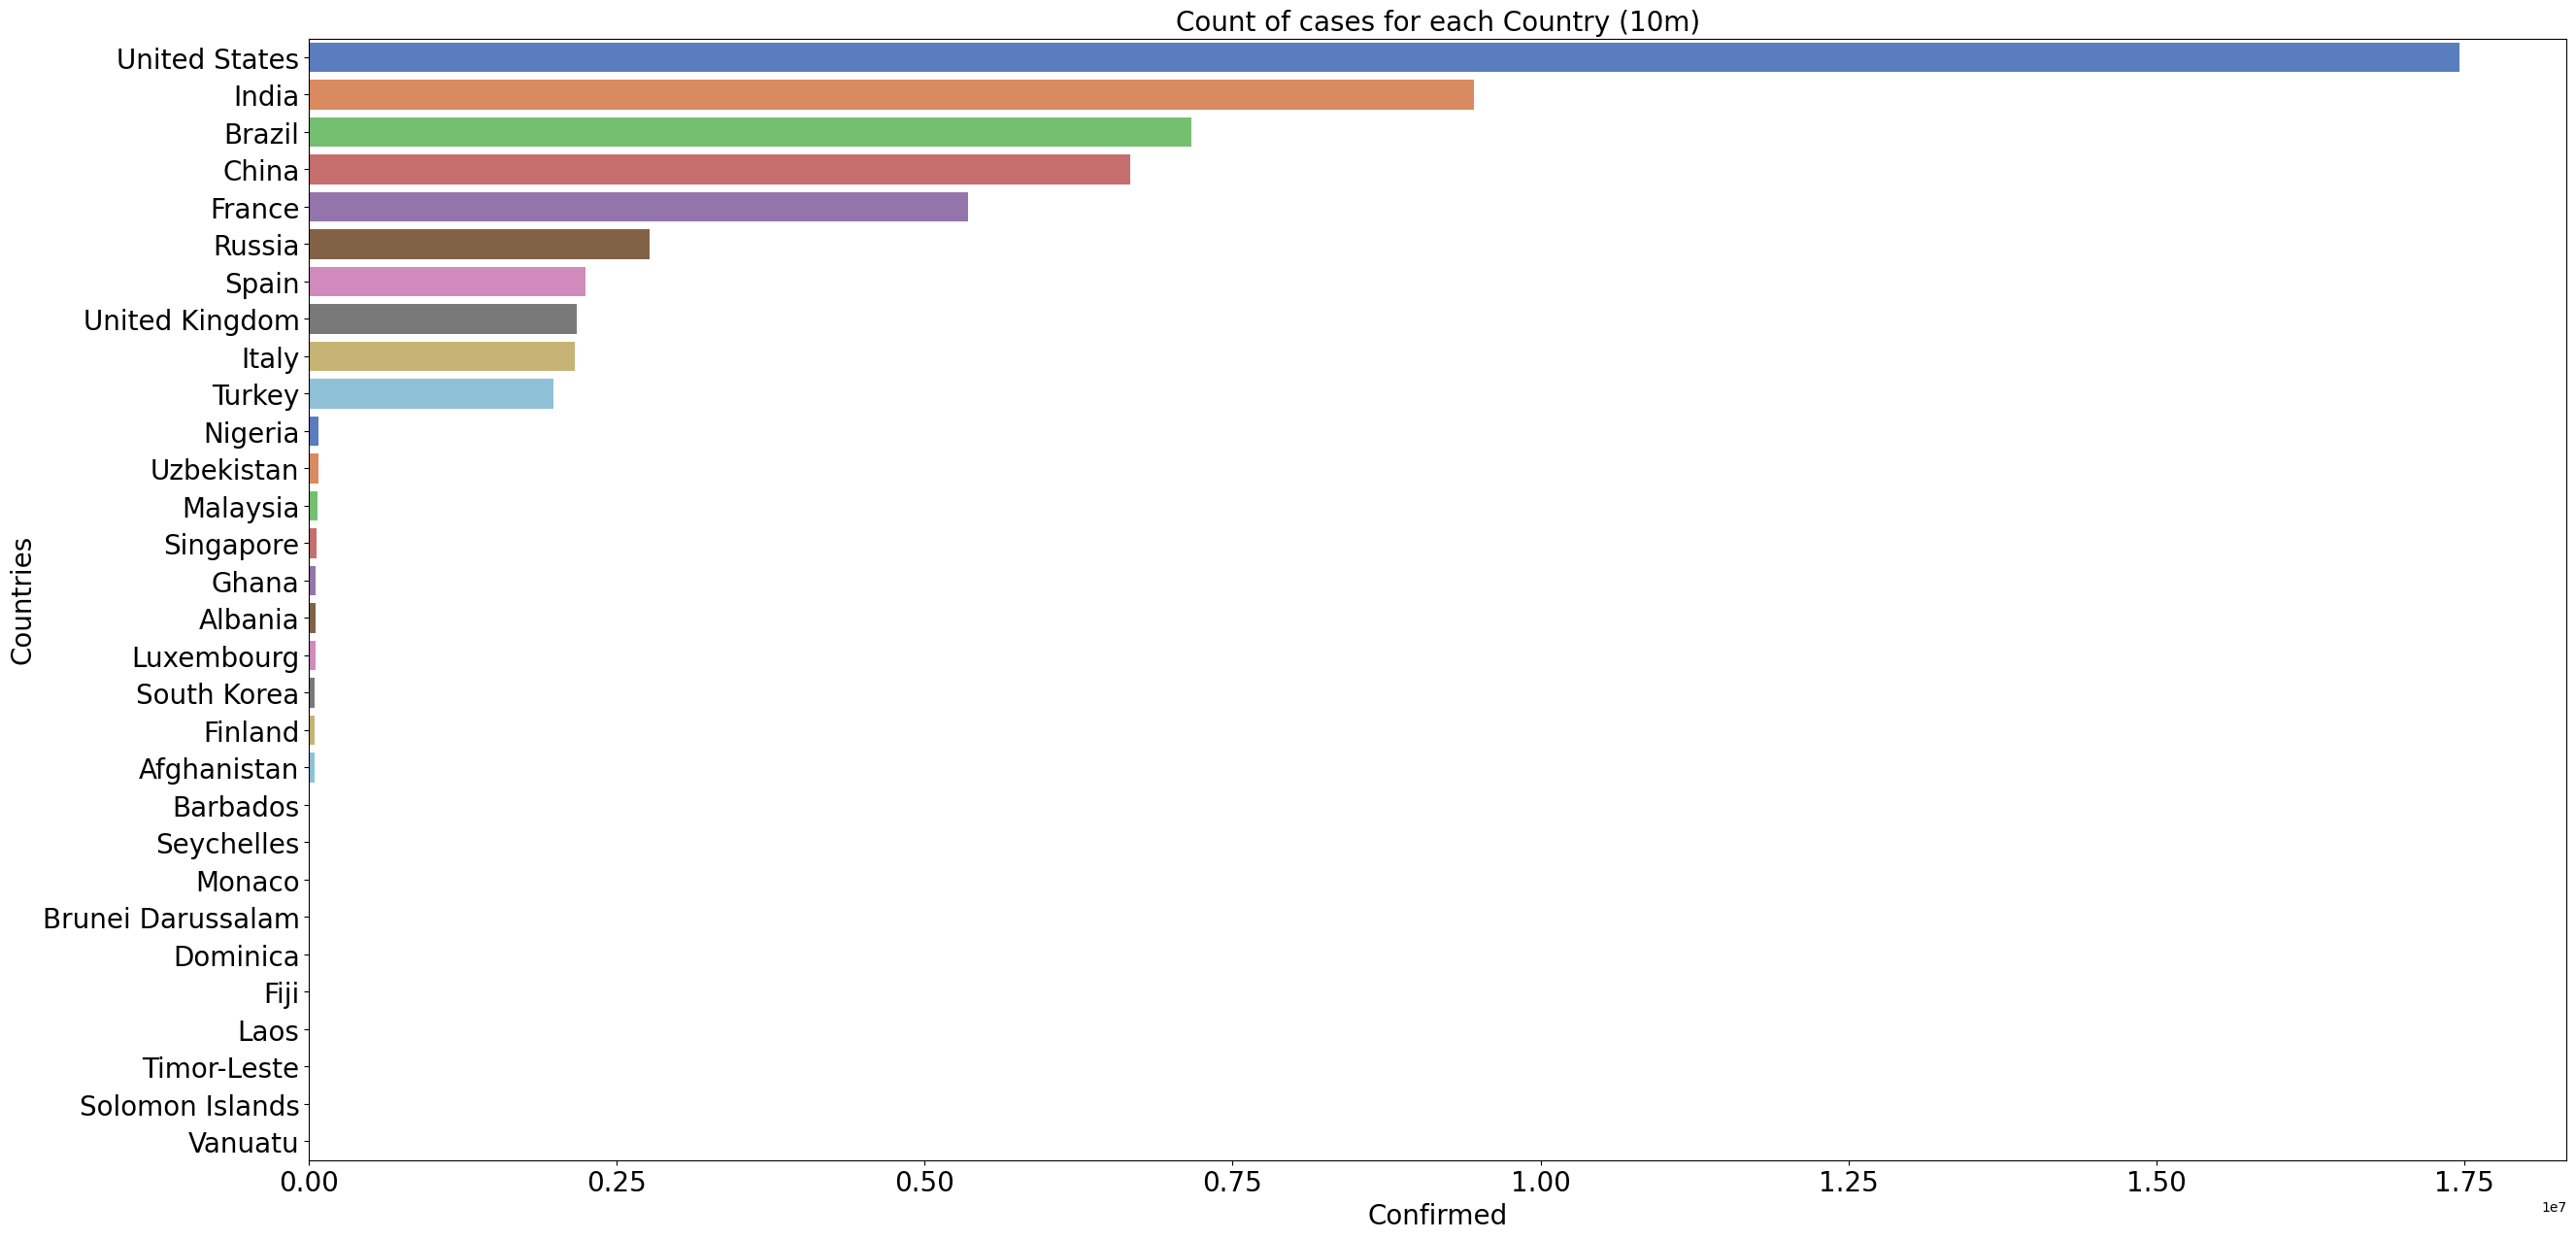

In [16]:
plt.rcdefaults()
plt.figure(figsize=(30,15))
ax = sns.barplot(x="Confirmed", y="standard_names", data=sample, palette = "muted")
ax.set_title('Count of cases for each Country (10m)', fontsize=20)
plt.xlabel('Confirmed', fontsize = 20)
plt.ylabel("Countries", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Line plots and regressions

In [143]:
# Define function for calculating linear regression and scatter plot with linear regression plot
def linear_regression(x,y,country):
#     print(f"The correlation coefficient of {country} is : {np.nan_to_num(round(st.pearsonr(x, y)[0],4))}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The correlation coefficient of {country} is : {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, c = "lightblue", edgecolor = "black")
    plt.plot(x,regress_values,"r-")
    plt.title(f"{country}'s correlation value: {rvalue}")
    plt.ylabel("Infection Rate")
    plt.xlabel("Stringency Index")
    plt.grid(alpha = .2)
    return line_eq

# Define a fuction for annotating
def plot_annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="black")

In [100]:
def ln_rg_country(country):
    x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country]\
            .str.rstrip('%').astype('float')
    a = x.min()
    b = y.max()
    line_eq = linear_regression(x,y, country)
    
    plot_annotate(line_eq, a, b)
    plt.savefig(f"Images/{country}_lin_reg_chart.png")
    plt.show()

In [136]:
def line_plots(country):    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    num_rcd = len(ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country])
    x_axis= range(1,num_rcd+1)
    tick_locations = [value for value in x_axis]
    y1 = ultimate_no_null_df["Confirmed"].loc[ultimate_no_null_df["standard_names"] == country]
    y2 = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y3 = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country]\
            .str.rstrip('%').astype('float')
#     plt.figure(1, figsize=(12,10))
#     plt.subplot(311)
#     plt.plot(x_axis, y1, color='orange', linewidth=2, markersize=12, label = "Confirmed")
#     plt.legend(loc='best')
#     plt.xlim(0,13)
#     plt.xlabel("2020")
#     plt.ylabel("Confirmed in millions")
#     plt.title(f"{country} Covid confirmed trend for 2020")
#     plt.xticks(tick_locations, months, rotation="vertical")
#     plt.grid()
#     plt.subplot(312)
#     plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
#     plt.legend(loc='best')
#     plt.xlim(0,13)
#     plt.ylim(0,100)
#     plt.xticks(tick_locations, months, rotation="vertical")
#     plt.xlabel("2020")
#     plt.ylabel("Stringency Index")
#     plt.title(f"{country} law stringency trend for 2020")
#     plt.grid()
#     plt.subplot(313)
#     plt.plot(x_axis, y3, color='red', linewidth=2, markersize=12, label = "Infection rate")
#     plt.legend(loc='best')
#     plt.xlim(0,13)
#     plt.xticks(tick_locations, months, rotation="vertical")
#     plt.xlabel("2020")
#     plt.ylabel("Infection rate")
#     plt.title(f"{country} infection rate for 2020")
#     plt.grid()

#     plt.tight_layout()
#     plt.show()
    max_count = y1.max()
    plt.rcdefaults()
    fig,ax1 = plt.subplots()
    plt.grid(alpha = .5, zorder = 0)
#     sns.set_palette("PuBuGn_d")
    data = ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country]
    ax1.set_xlabel("Month", fontsize =16)
    
#     ax1 = sns.lineplot(x= "month", y = "Confirmed", data = data , zorder = 3, palette='red')
    plt.plot(x_axis, y3, color='orange', linewidth=2, markersize=12, label = "Infection rate")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xlabel("2020")
    plt.ylabel("Infection rate")
    plt.title(f"{country} Covid confirmed trend for 2020")
    plt.xticks(tick_locations, months[:num_rcd], rotation="vertical")
#     if max_count >= 1000000:
#         ax1.set_ylabel("Confirmed in millions", fontsize =16)
   
        
    ax2 = ax1.twinx()
#     sns.set_palette("pastel")    
#     ax2 = sns.lineplot(x= "month", y = "stringency_index", data = data , zorder = 3, palette='blue').set_title(f"Confirmed vs. Stringency Index for {country}")
    plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
    
    plt.legend(loc='lower right')
    plt.ylim(0,100)
    plt.savefig(f"Images/{country}_line_chart.png")
    plt.show()

In [125]:
def line_latency(country):    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    num_rcd = len(ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country])
    x_axis= range(1,num_rcd+1)
    tick_locations = [value for value in x_axis]
    y1 = ultimate_no_null_df["Confirmed"].loc[ultimate_no_null_df["standard_names"] == country]
    y2 = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y3 = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country].str.rstrip('%').astype('float')
    plt.figure(1, figsize=(12,10))
    plt.subplot(311)
    plt.plot(range(2,num_rcd+1), y1[1:], color='orange', linewidth=2, markersize=12, label = "Confirmed")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xlabel("2020")
    plt.ylabel("Confirmed in millions")
    plt.title(f"{country} Covid confirmed trend for 2020")
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.grid()
    plt.subplot(312)
    plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.ylim(0,100)
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.xlabel("2020")
    plt.ylabel("Stringency Index")
    plt.title(f"{country} law stringency trend for 2020")
    plt.grid()
    plt.subplot(313)
    plt.plot(range(2,num_rcd+1), y3[1:], color='red', linewidth=2, markersize=12, label = "Infection rate")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.xlabel("2020")
    plt.ylabel("Infection rate")
    plt.title(f"{country} infection rate for 2020")
    plt.grid()

    plt.tight_layout()
    plt.show()

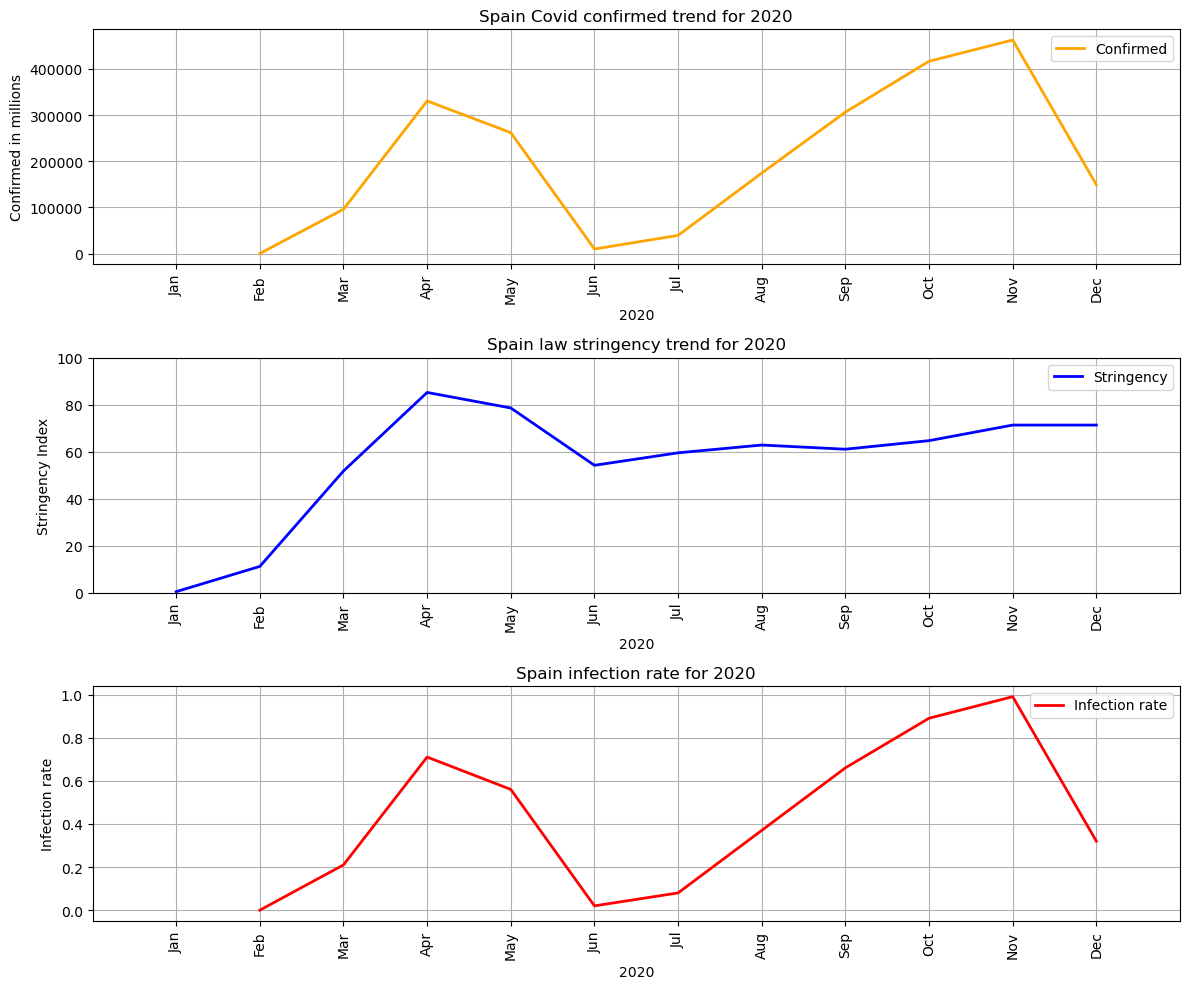

In [126]:
line_latency("Spain")

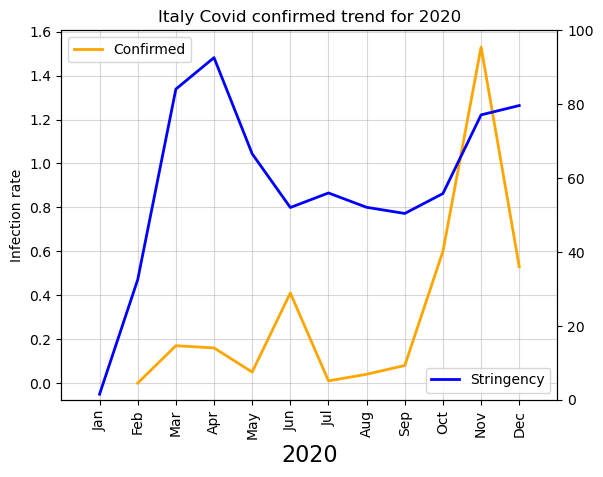

In [133]:
line_plots("Italy")

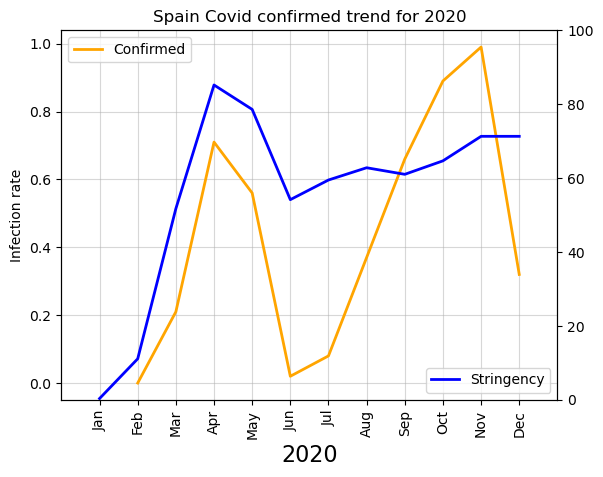

In [134]:
line_plots("Spain")

The correlation coefficient of India is : 0.3785


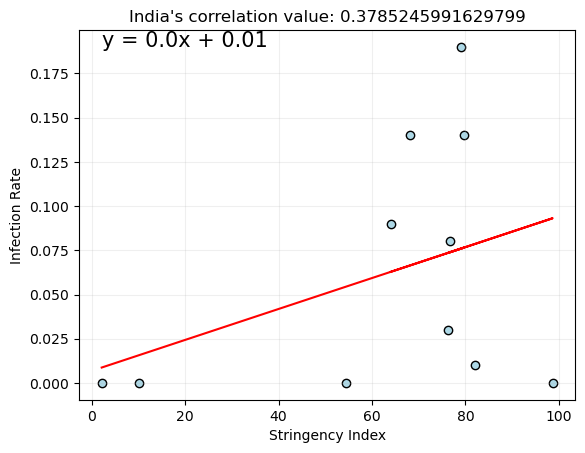

In [139]:
ln_rg_country("India")

# Correlation coefficients

In [23]:
country = list(set(ultimate_no_null_df["standard_names"]))
country.sort()
corrcoef = []
p_value = []
r_value = []

for name in range(len(country)):
    x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country[name]]
    y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country[name]]\
            .str.rstrip('%').astype('float')
    corrcoef.append(round(st.pearsonr(x, y)[0],4))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    p_value.append(pvalue)
    r_value.append(rvalue)
    
country_r_value_df = pd.DataFrame({"standard_names" : country,
                                  "corrcoef" : corrcoef,
                                  "p_value" : p_value,
                                  "r_value" : r_value})
country_r_value_df.head(-5)

C:\Users\mosab\.conda\envs\PythonData\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



standard_names  corrcoef   p_value   r_value
0       Afghanistan    0.6232  0.040532  0.623166
1           Albania    0.1794  0.576960  0.179378
2           Algeria    0.5162  0.085815  0.516150
3           Andorra    0.5396  0.070175  0.539615
4            Angola    0.2133  0.505693  0.213279
..              ...       ...       ...       ...
160  United Kingdom    0.4202  0.173819  0.420198
161   United States    0.5499  0.063970  0.549925
162         Uruguay    0.2785  0.380783  0.278476
163      Uzbekistan    0.2075  0.517546  0.207506
164         Vanuatu       NaN  1.000000  0.000000

[165 rows x 4 columns]

In [111]:
x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == "India"]
y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == "India"]\
        .str.rstrip('%').astype('float')
print(round(st.pearsonr(x, y)[0],2))
print(round(st.pearsonr(x, y)[1],2))
print(round(np.corrcoef(x,y)[0][1],2))

nan
0.25
0.38


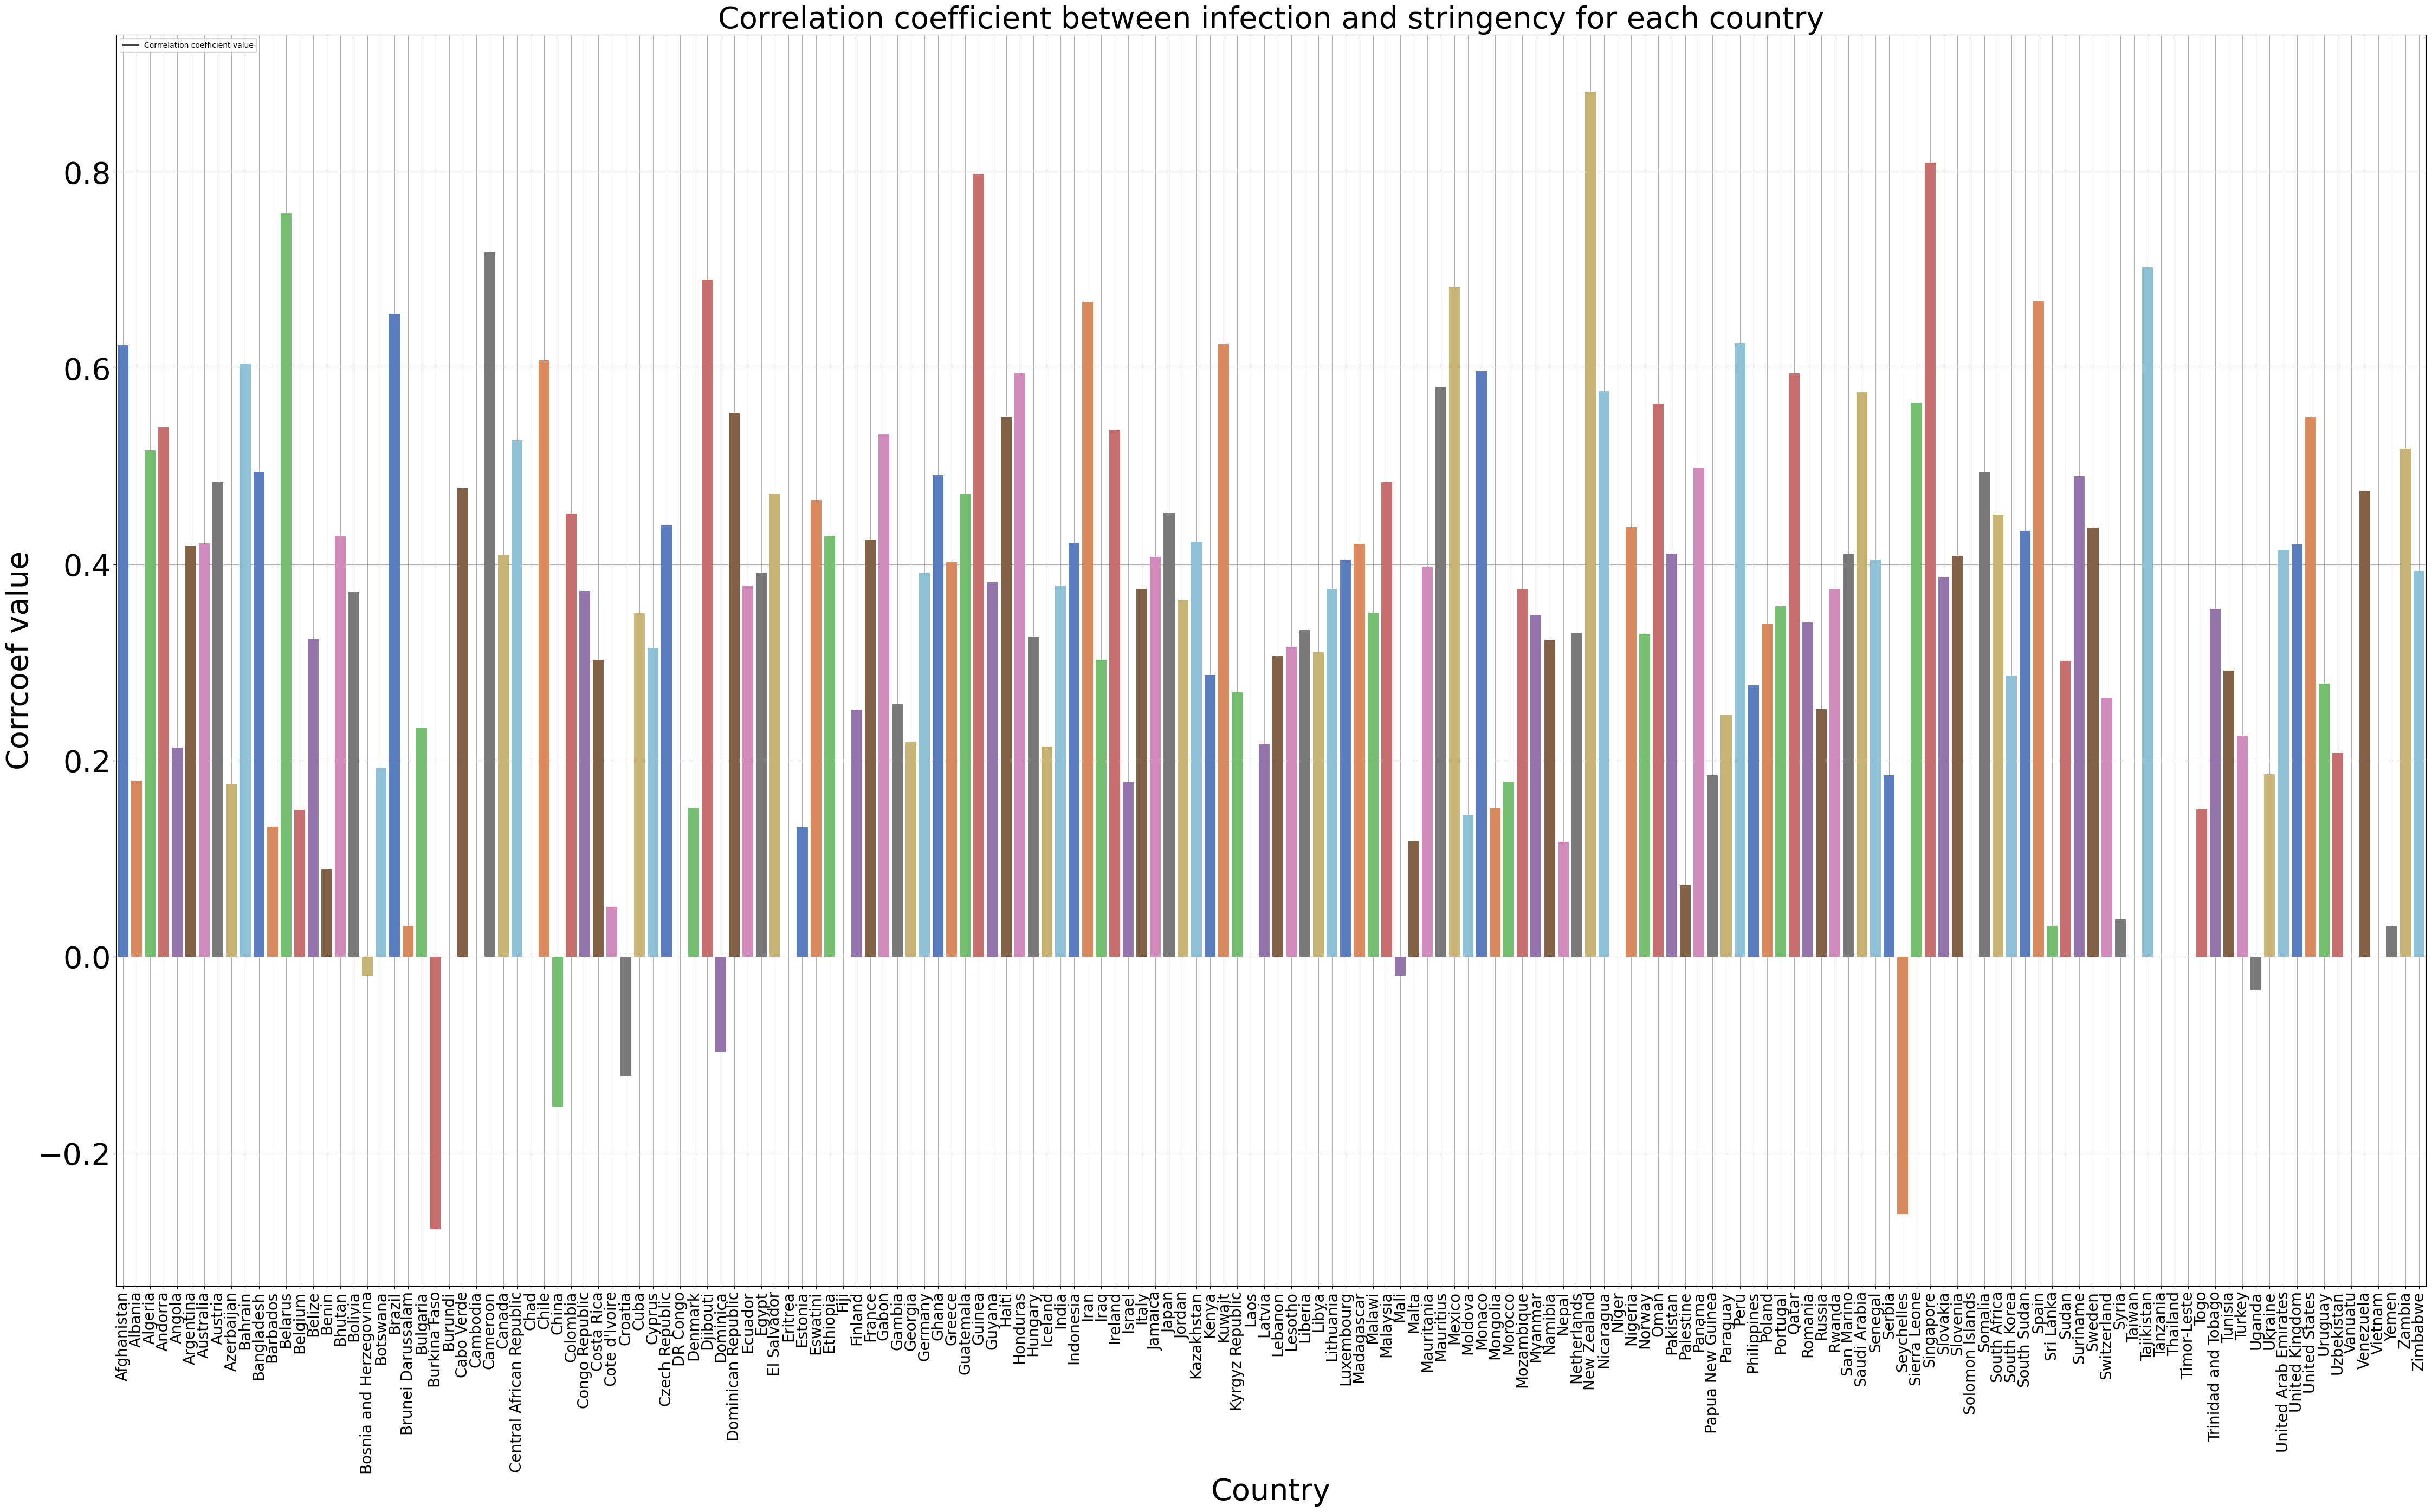

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(country_r_value_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(55,30))

sns.barplot(x= "standard_names", y = "corrcoef", data = country_r_value_df, palette = "muted" , zorder = 3)
# plt.bar(x_axis, country_r_value_df["corrcoef"], color='blue', align="center", width = 0.52, zorder = 3)
plt.xticks(tick_locations, country, rotation="vertical" , fontsize =20)

# Set limits for x & y axes
# plt.xlim(-0.55, len(x_axis)-0.45)
# plt.ylim(0, max(country_r_value_df["corrcoef"])*1.05)

# Set labels for axes & title for the chart
plt.title("Correlation coefficient between infection and stringency for each country", fontsize =40)
plt.xlabel("Country", fontsize =40)
plt.ylabel("Corrcoef value", fontsize =40)

# Creating and displaying legend
column_name = ["Corrrelation coefficient value"]
plt.legend(column_name,loc="best")
plt.grid(zorder=0)
plt.yticks(fontsize = 40)
# Display the plot
# plt.savefig("Images/bar_chart.png")
plt.show()

In [25]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

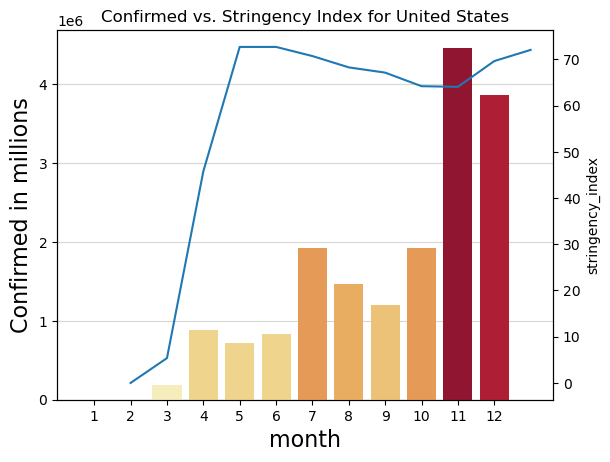

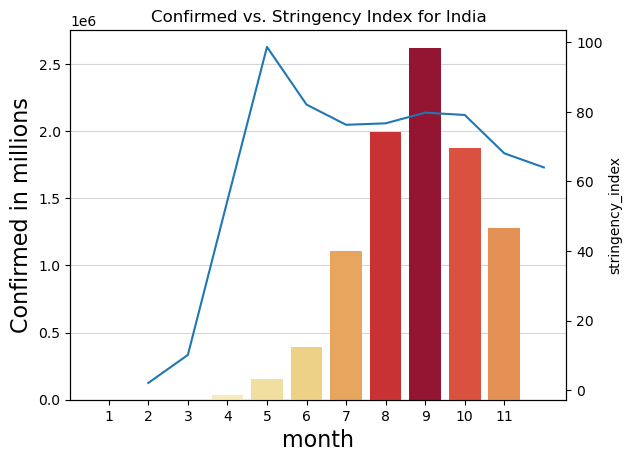

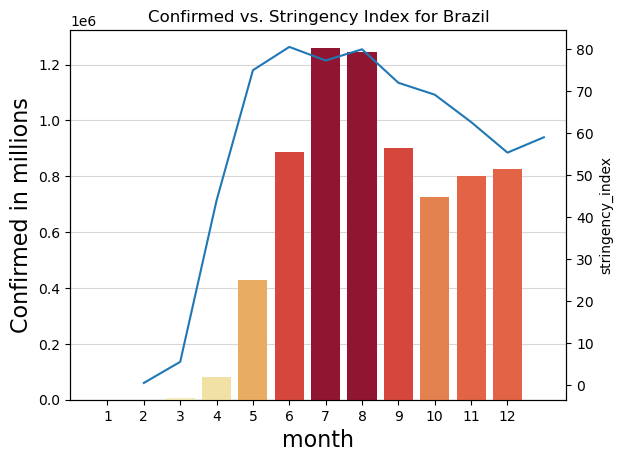

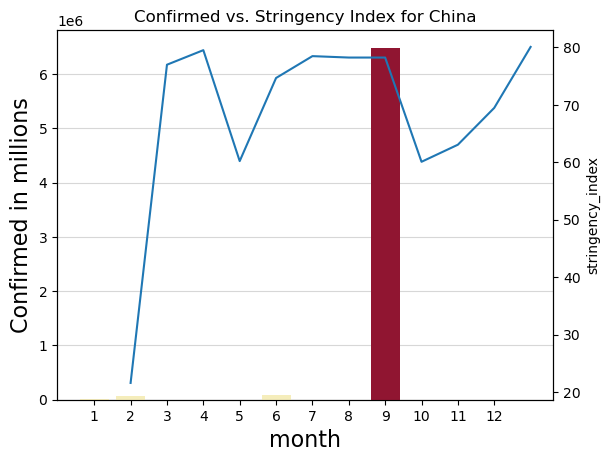

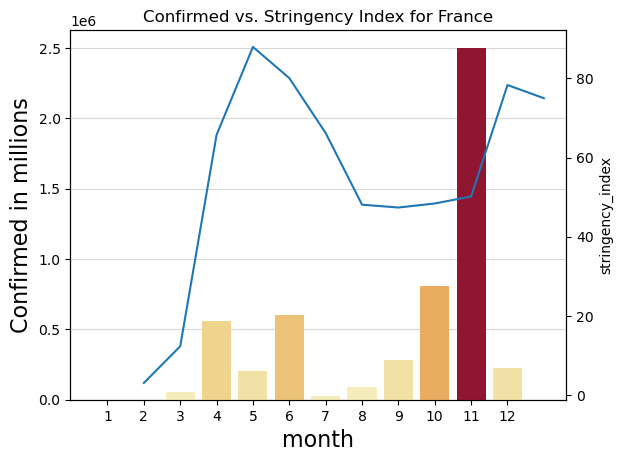

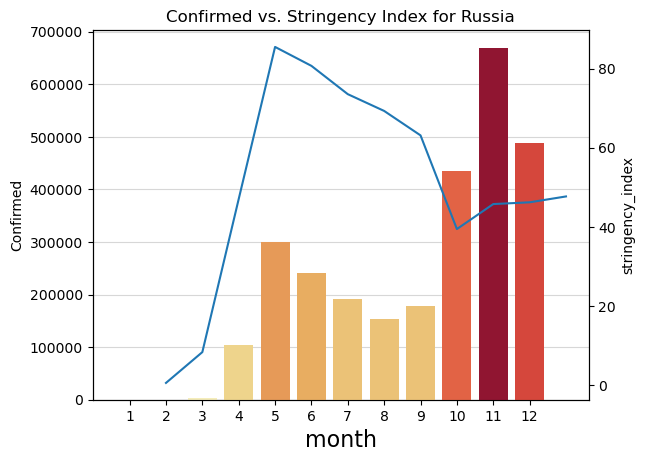

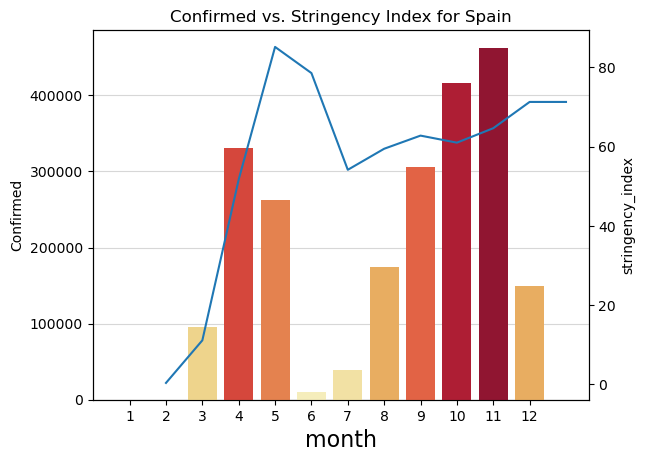

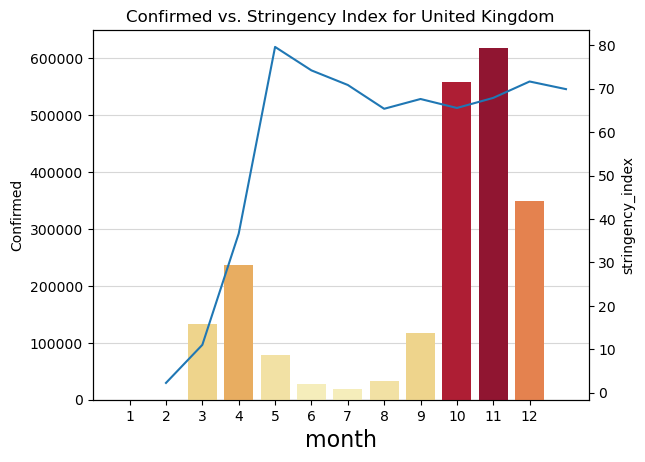

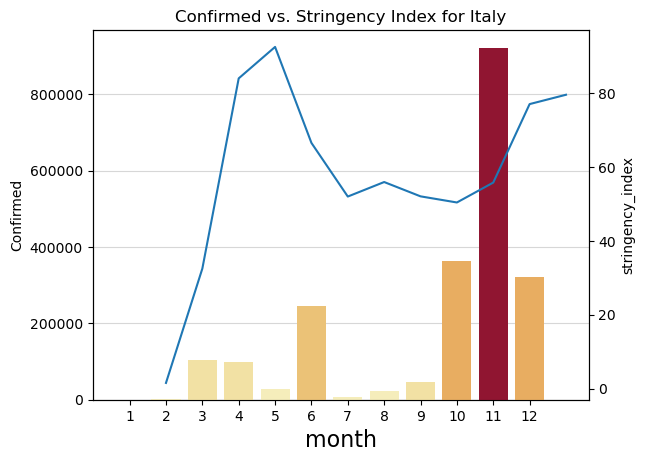

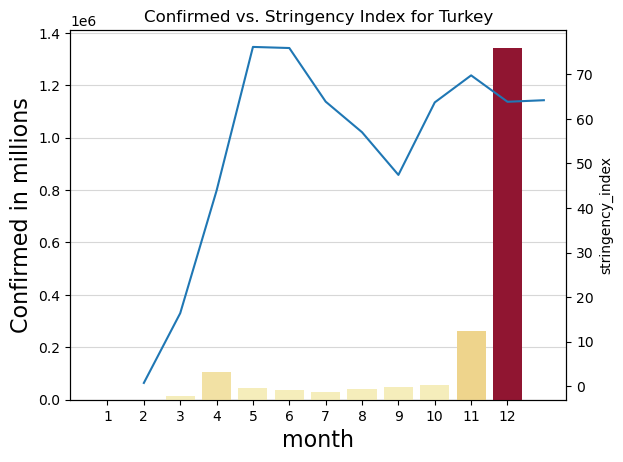

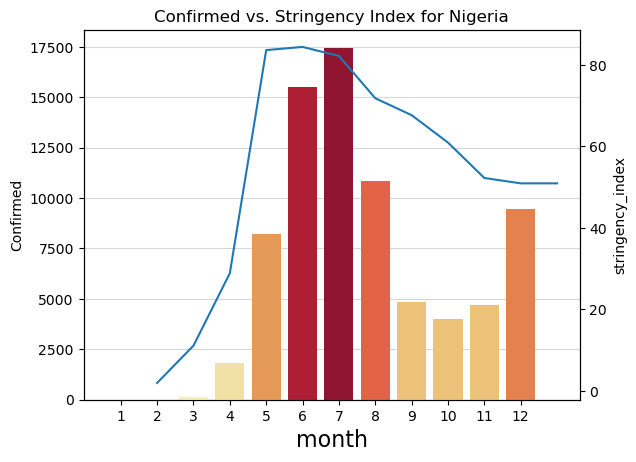

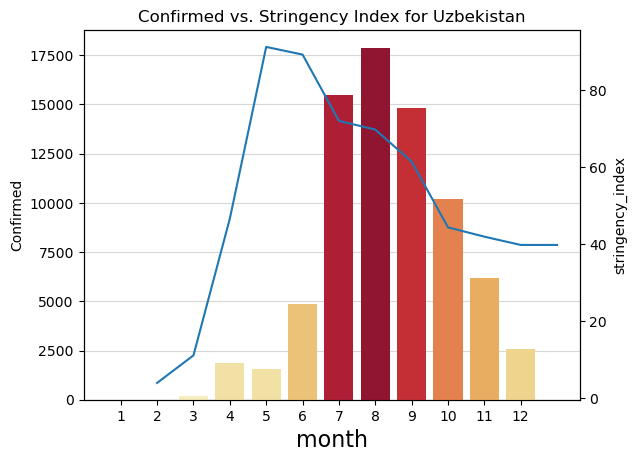

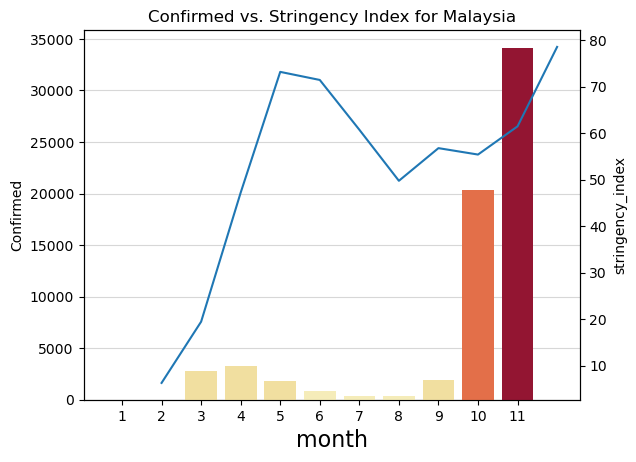

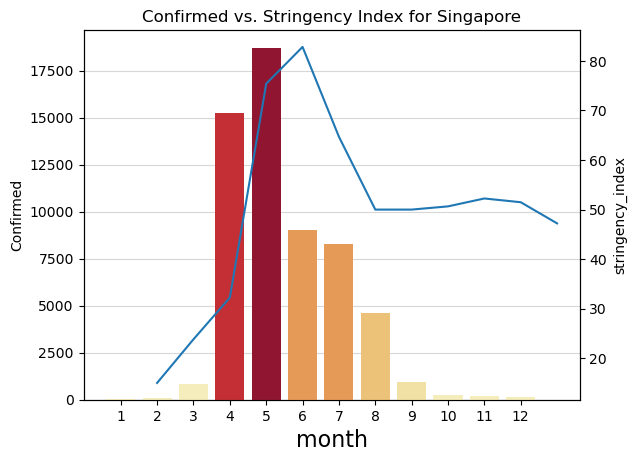

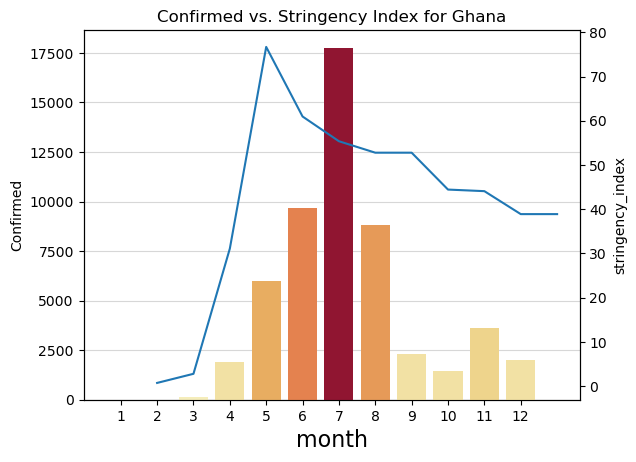

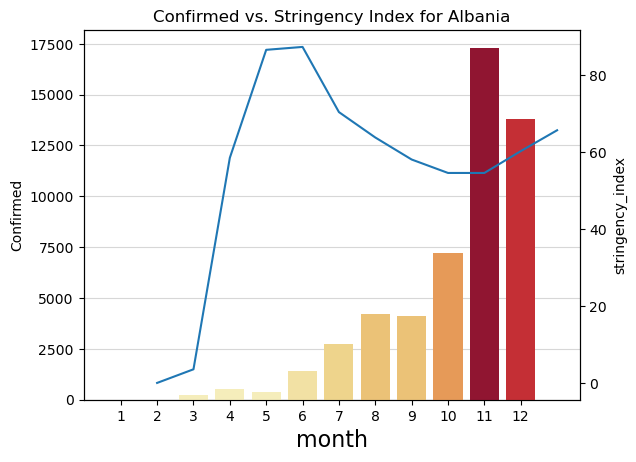

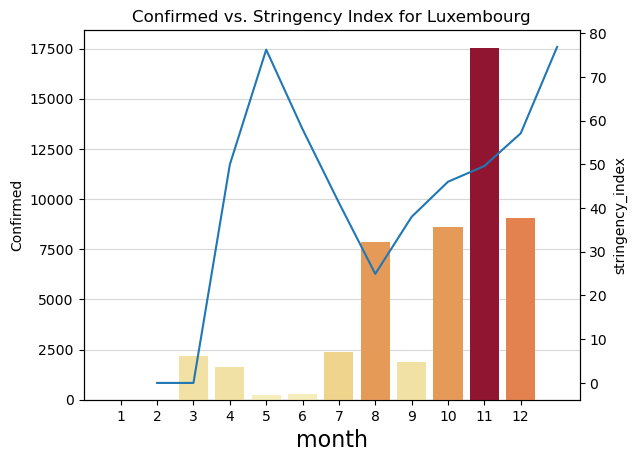

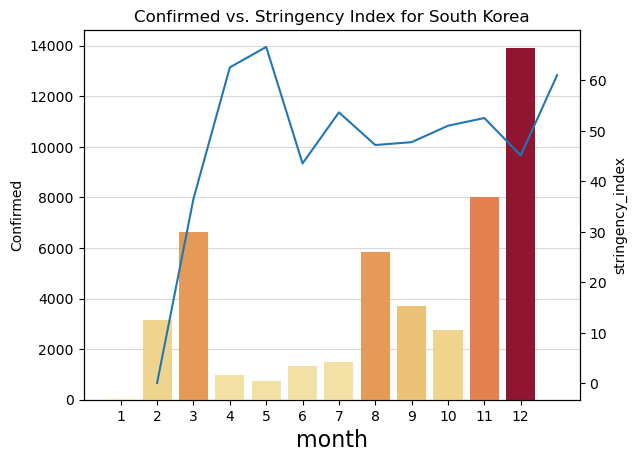

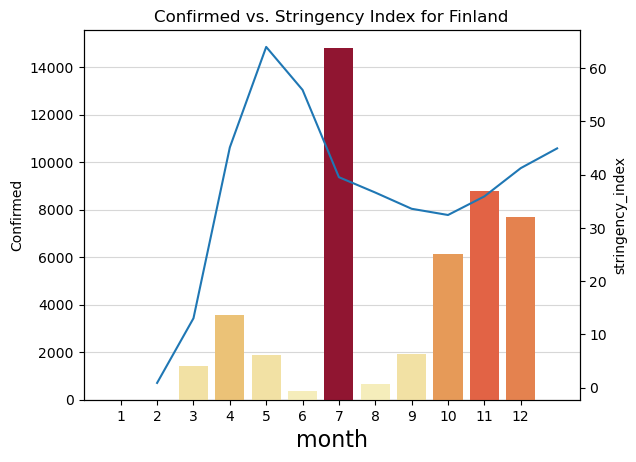

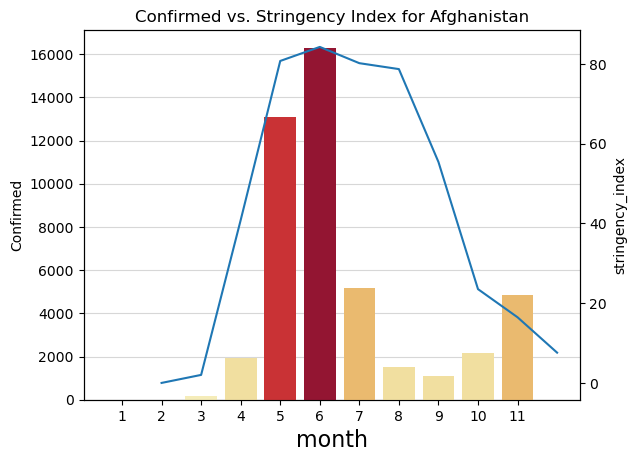

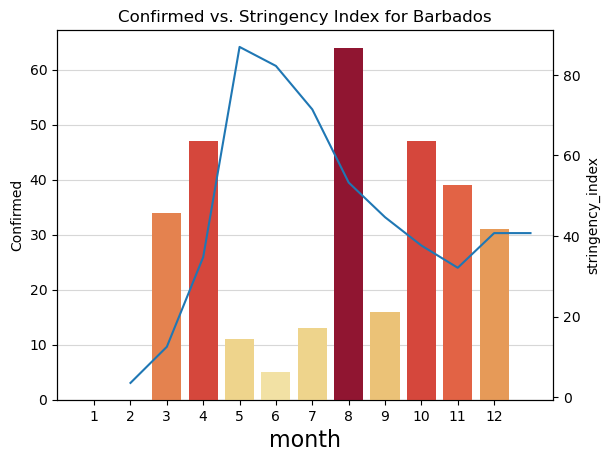

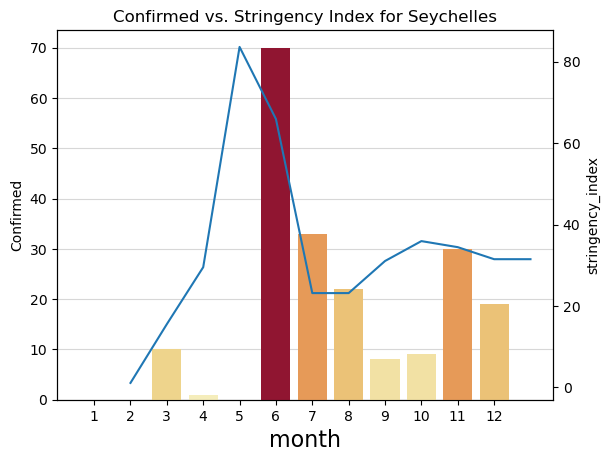

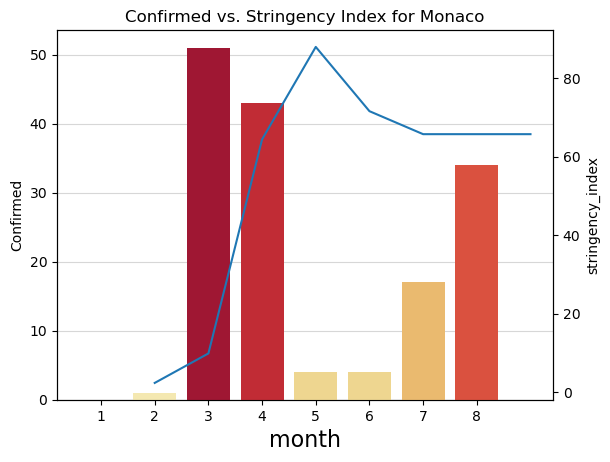

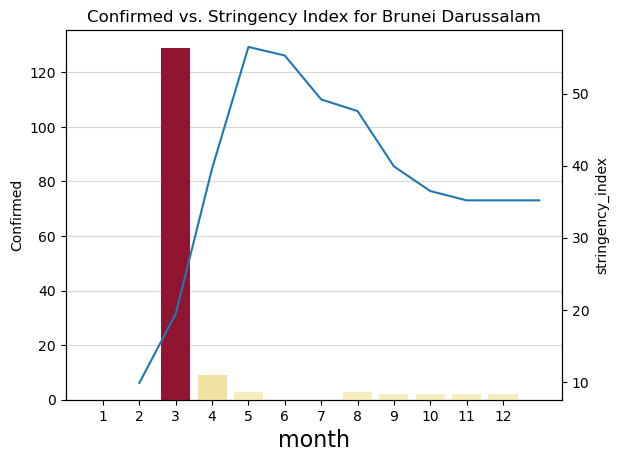

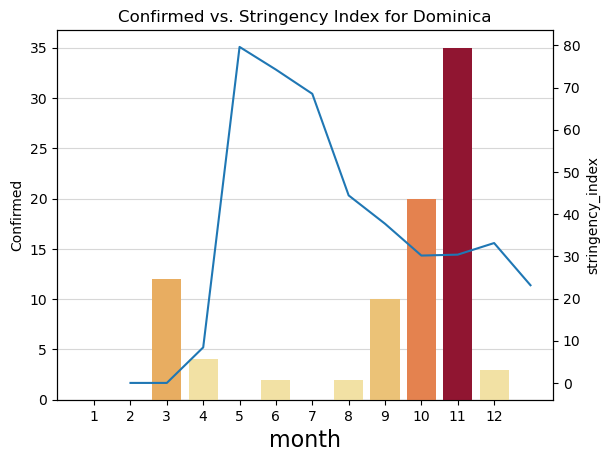

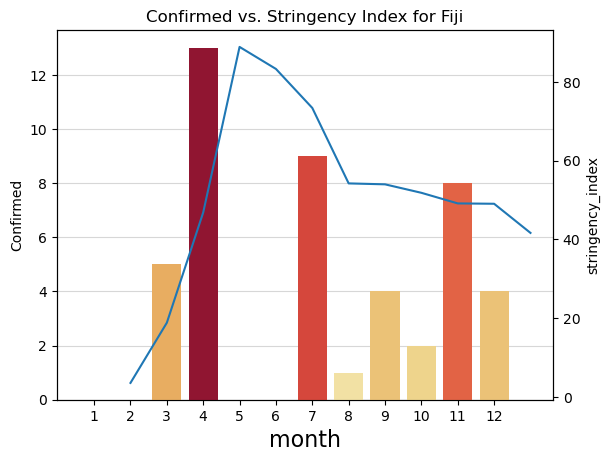

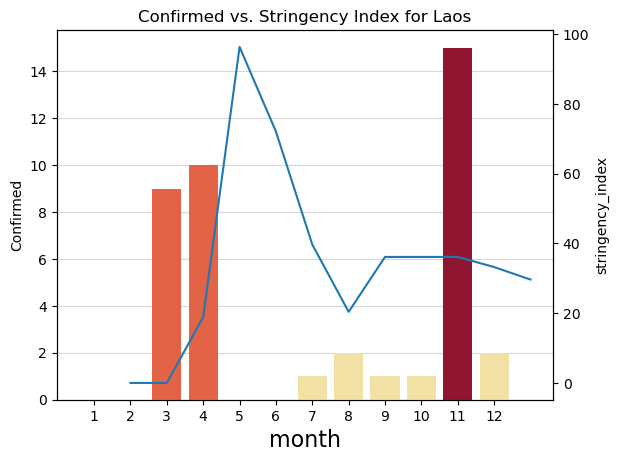

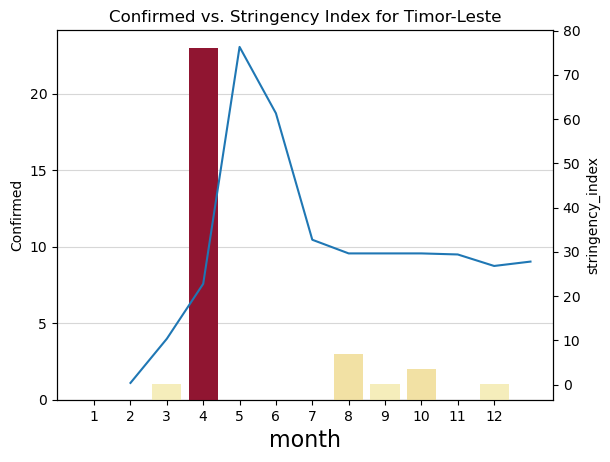

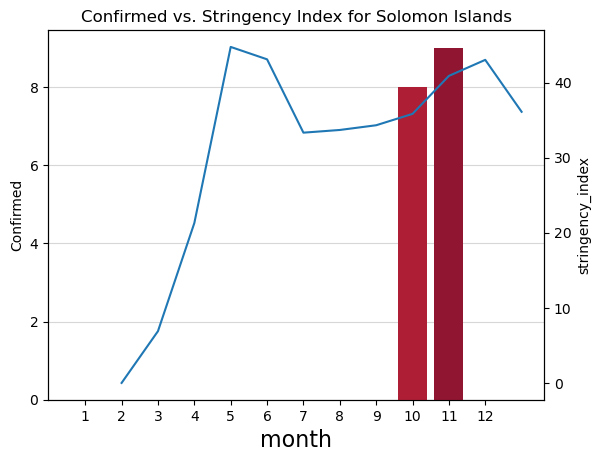

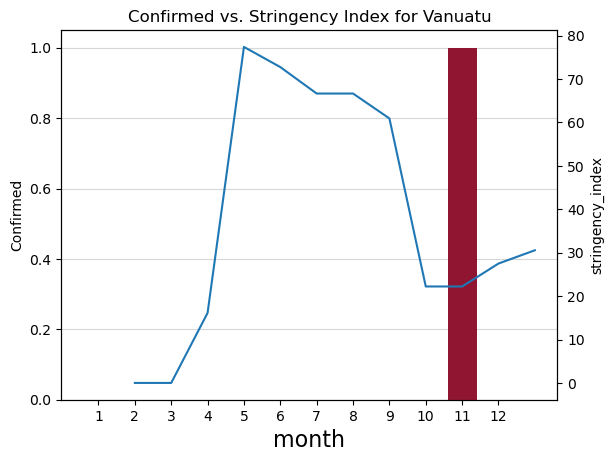

In [27]:
for i in range(len(sample)):
    country = sample.iloc[i,0]
    data = ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country]
    max_count = data["Confirmed"].max()
    plt.rcdefaults()
    fig,ax1 = plt.subplots()
    plt.grid(alpha = .5, zorder = 0)
    color = "tab:green"
    
    ax1.set_xlabel("Month", fontsize =16)
    qualitative_colors = sns.color_palette("YlOrRd", 12)
    ax1 = sns.barplot(x= "month", y = "Confirmed", data = data, palette = colors_from_values(data["Confirmed"], "YlOrRd") , zorder = 3)
#
    if max_count >= 1000000:
        ax1.set_ylabel("Confirmed in millions", fontsize =16)
   
        
    ax2 = ax1.twinx()
    color = "tab:red"
    
    ax2 = sns.lineplot(x= "month", y = "stringency_index", data = data , zorder = 3).set_title(f"Confirmed vs. Stringency Index for {country}")
    
    
    plt.show()

The correlation coefficient of United States is : 0.5499250670633851


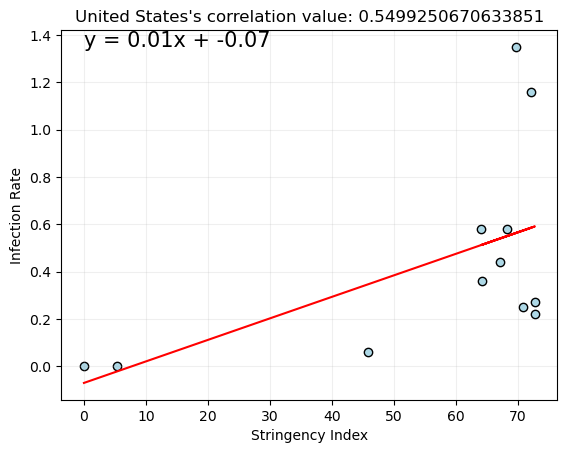

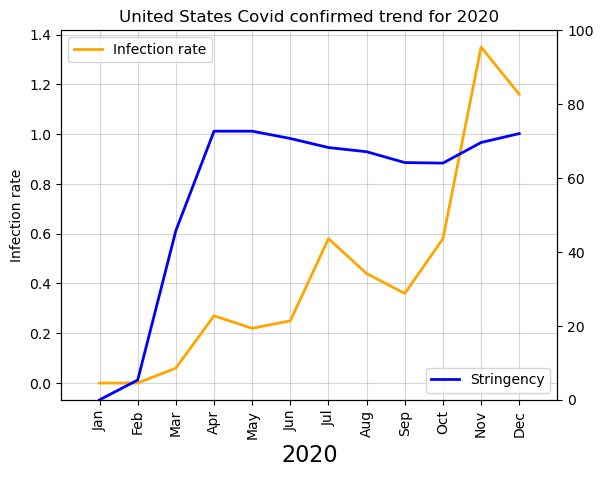

The correlation coefficient of India is : 0.3785245991629799


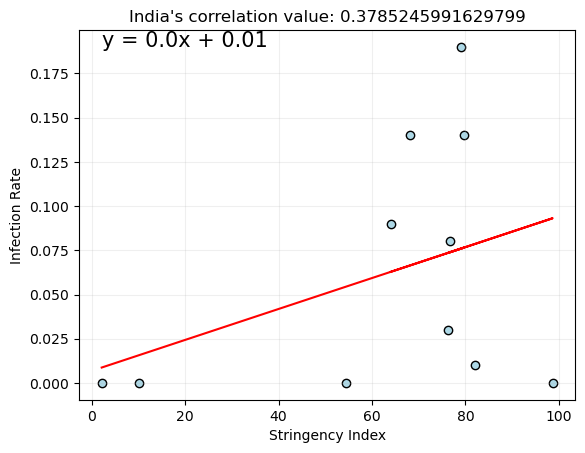

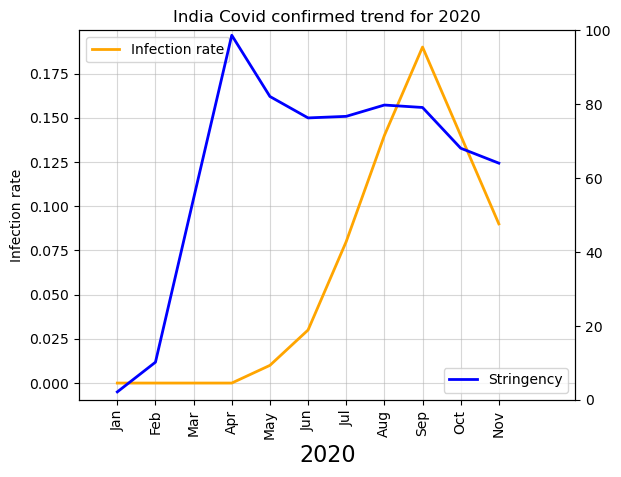

The correlation coefficient of Brazil is : 0.655648415654577


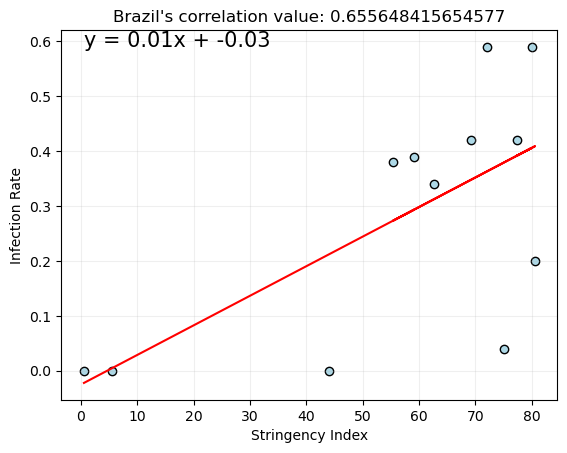

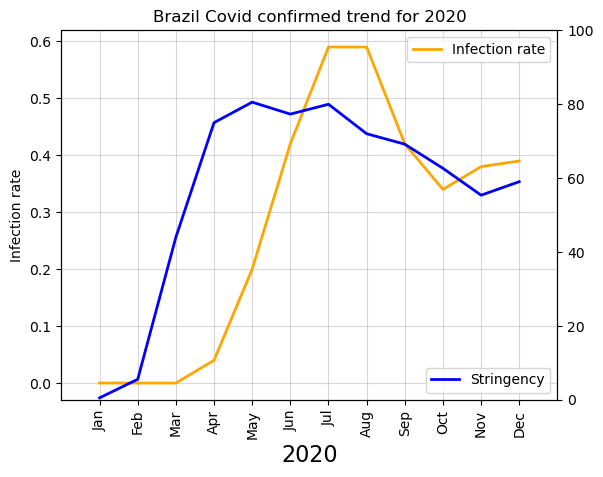

The correlation coefficient of China is : -0.15360541707799724


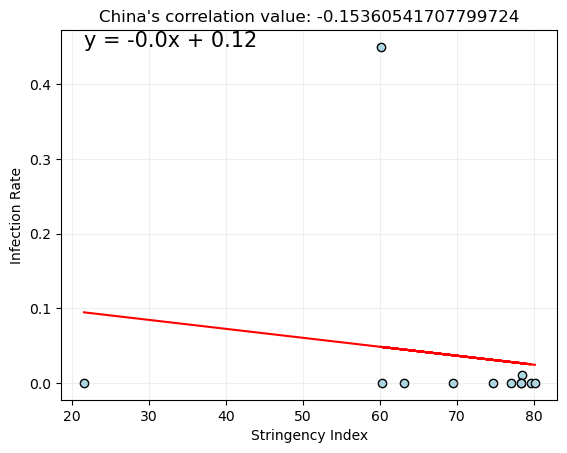

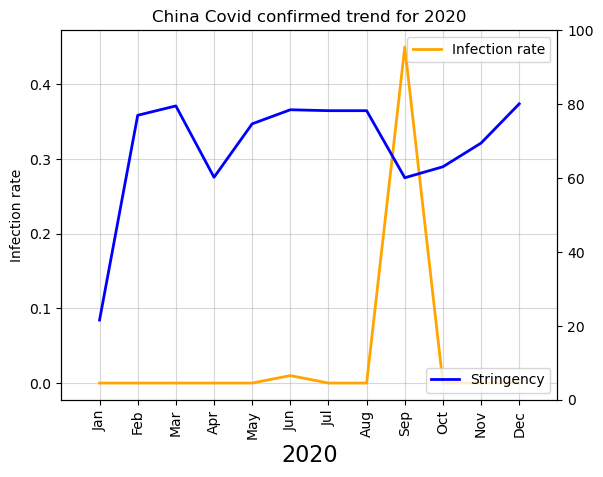

The correlation coefficient of France is : 0.42520027141438044


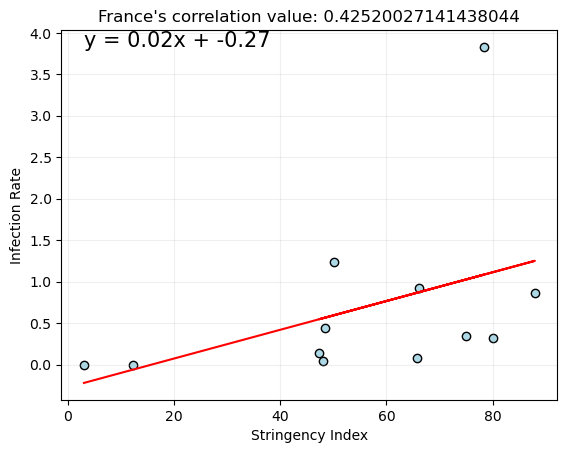

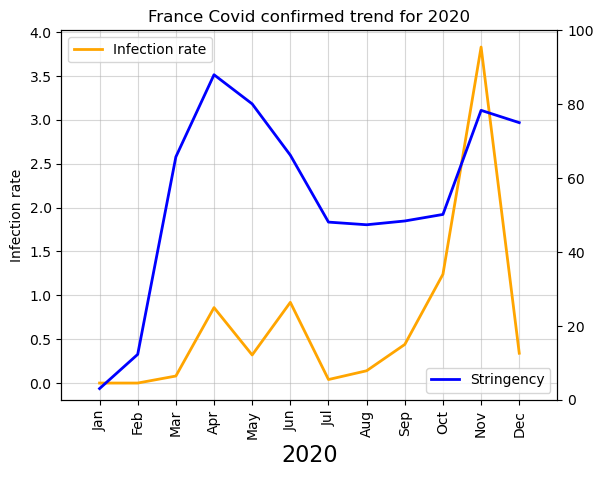

The correlation coefficient of Russia is : 0.2522334346122899


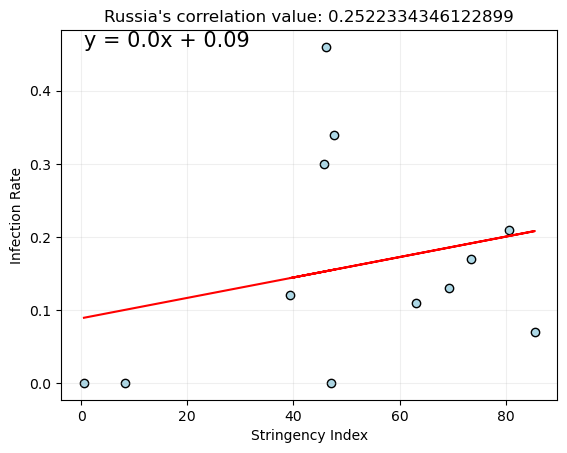

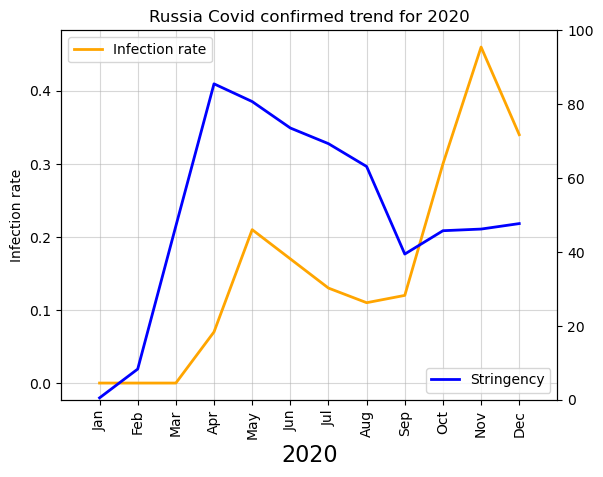

The correlation coefficient of Spain is : 0.6681299836047067


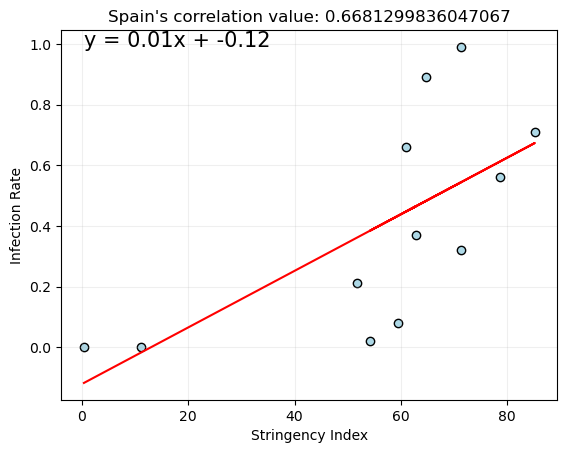

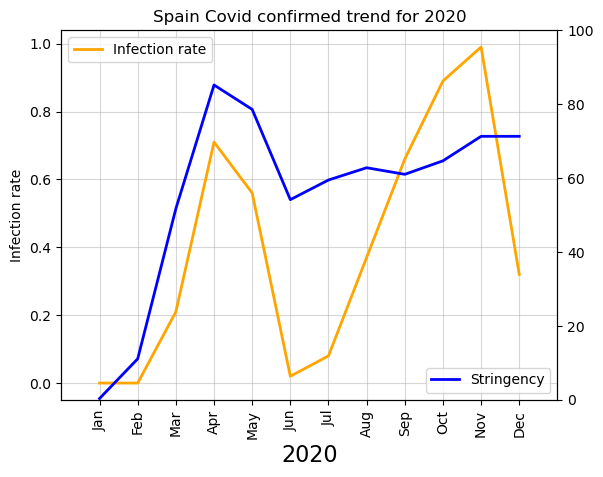

The correlation coefficient of United Kingdom is : 0.4201984723051414


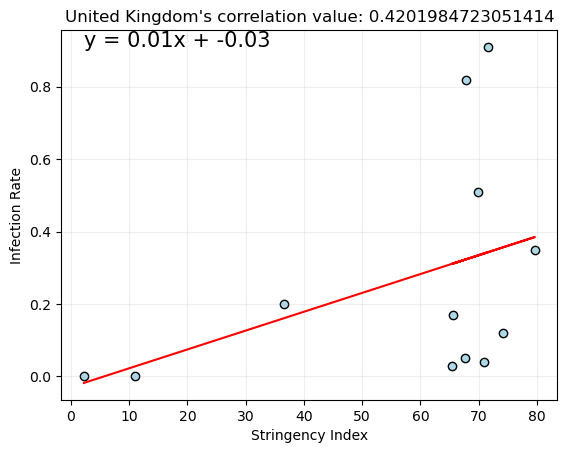

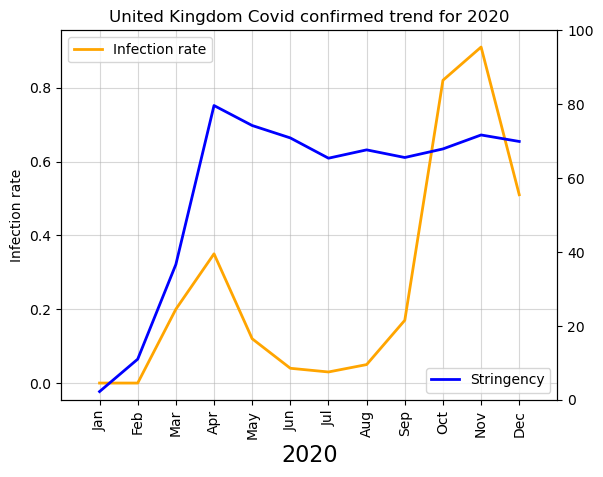

The correlation coefficient of Italy is : 0.37501285993770855


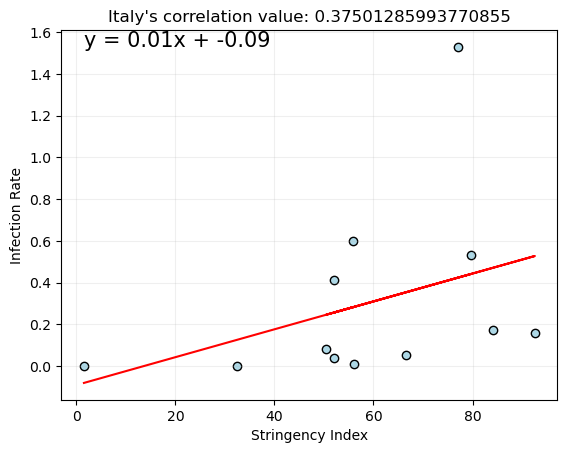

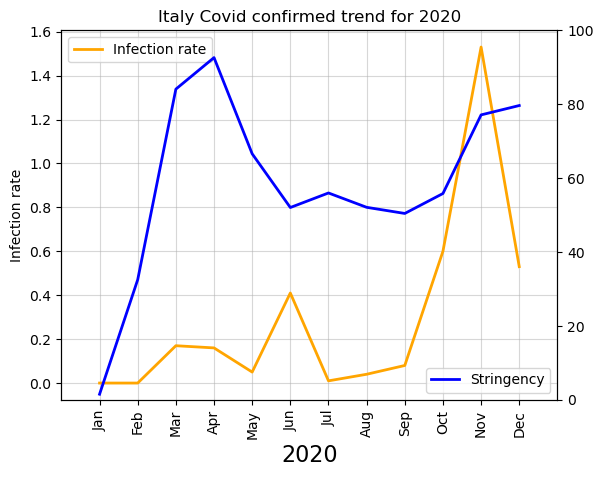

The correlation coefficient of Turkey is : 0.22548145394723063


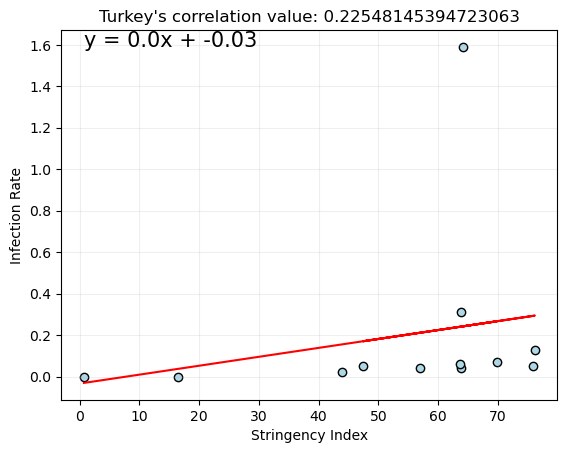

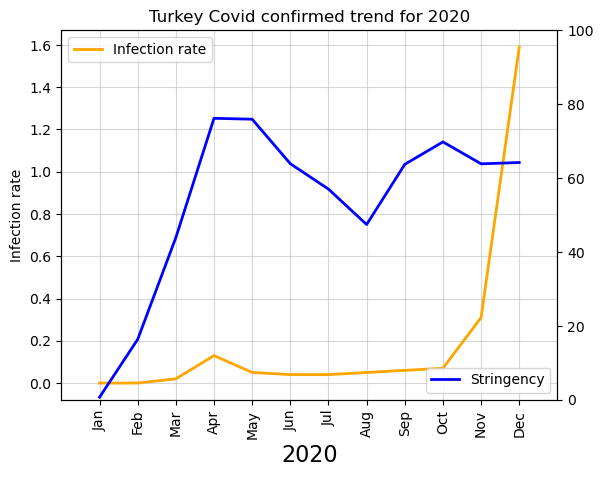

The correlation coefficient of Nigeria is : 0.4376728408035107


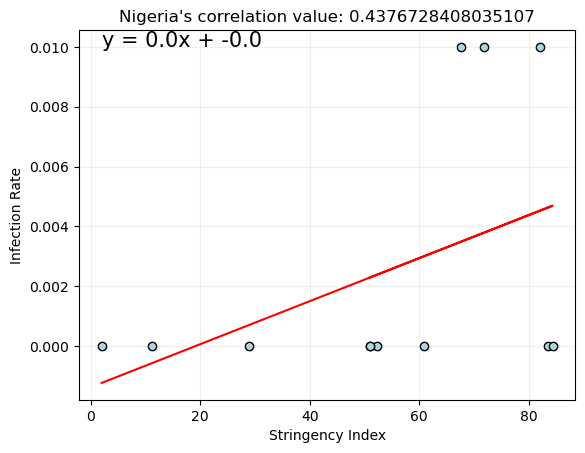

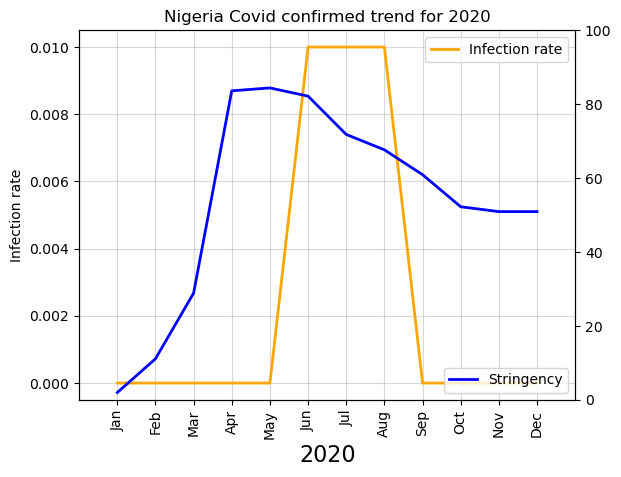

The correlation coefficient of Uzbekistan is : 0.20750595753904222


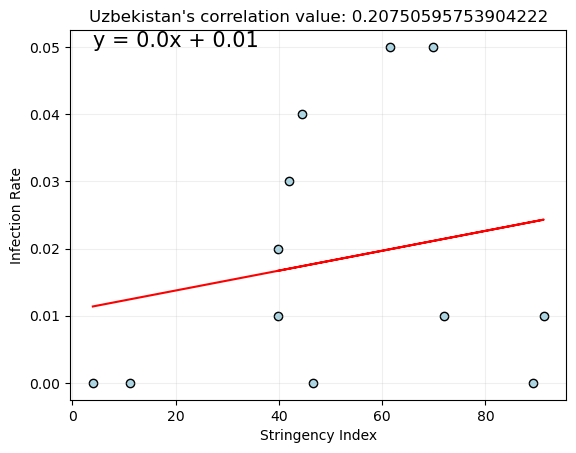

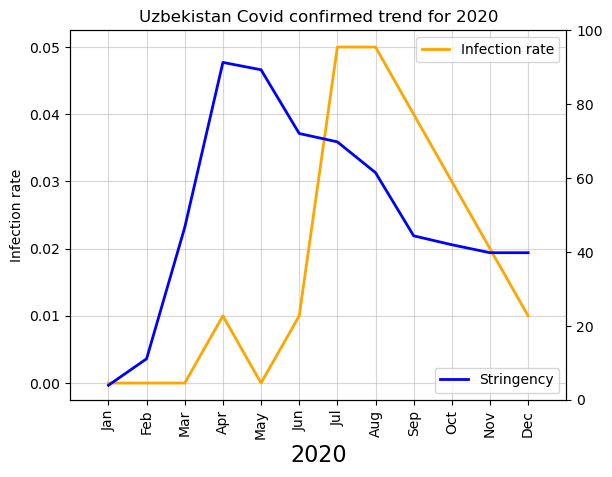

The correlation coefficient of Malaysia is : 0.48354131185211435


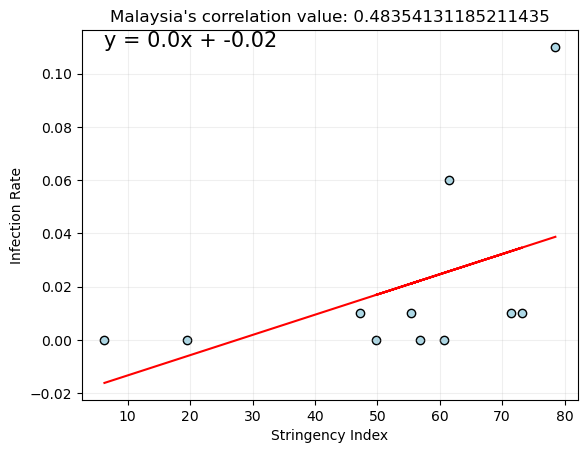

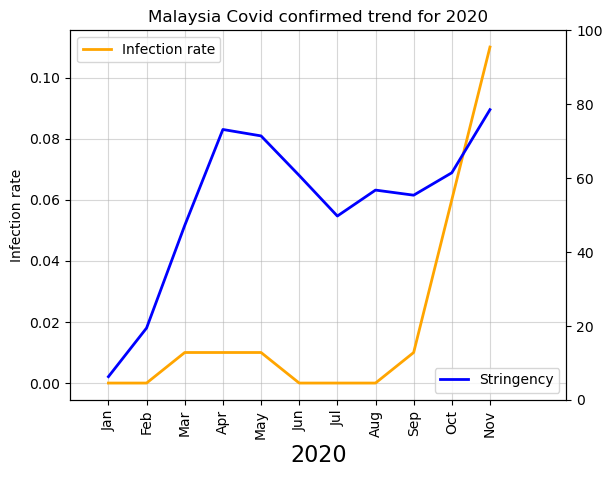

The correlation coefficient of Singapore is : 0.8097093783717816


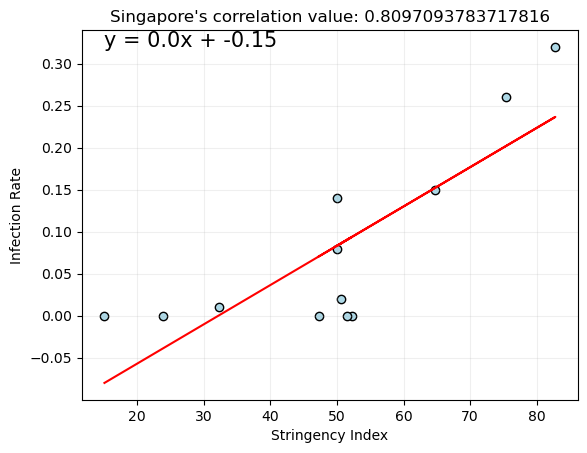

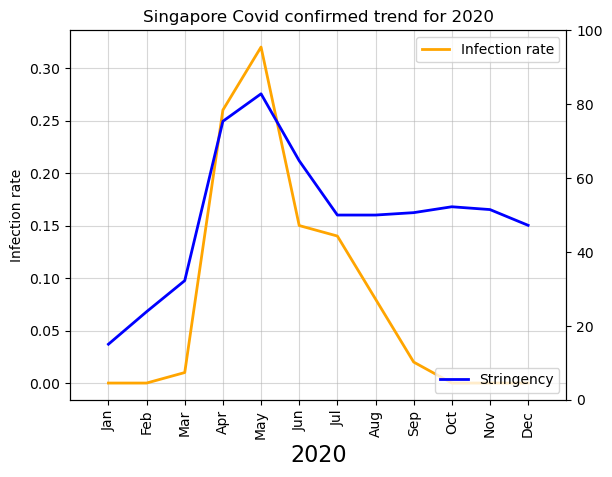

The correlation coefficient of Ghana is : 0.4910024035296588


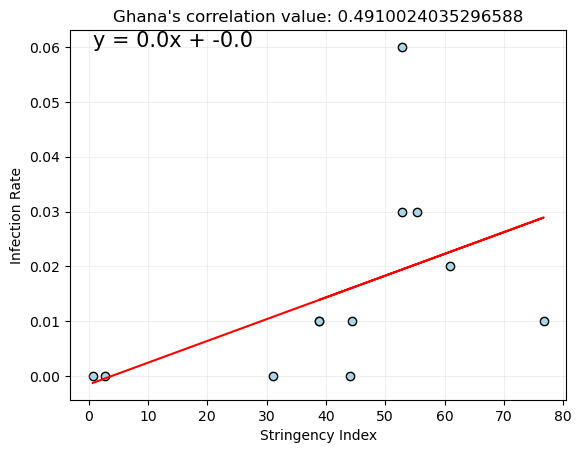

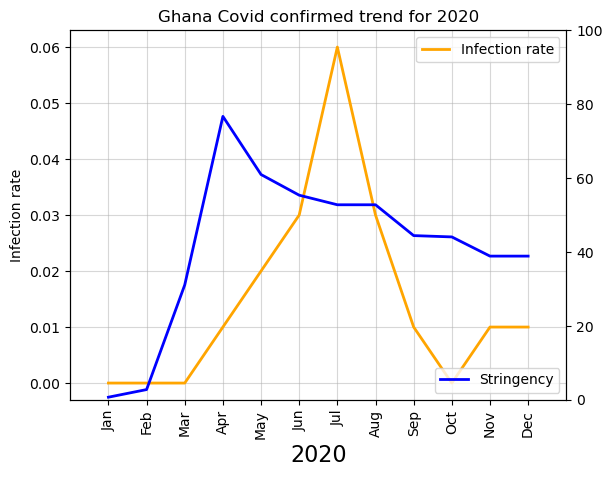

The correlation coefficient of Albania is : 0.1793782396461487


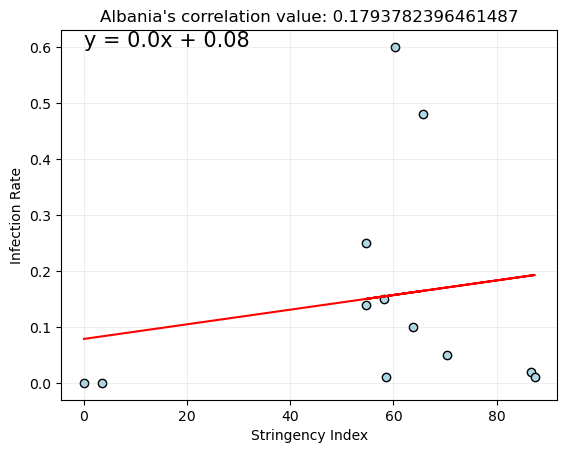

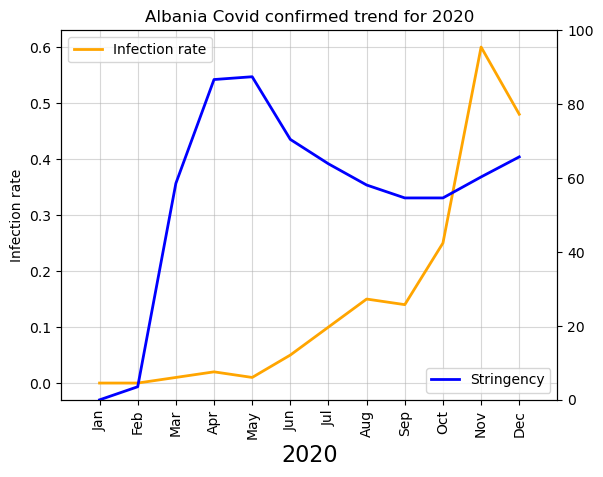

The correlation coefficient of Luxembourg is : 0.40495473111811897


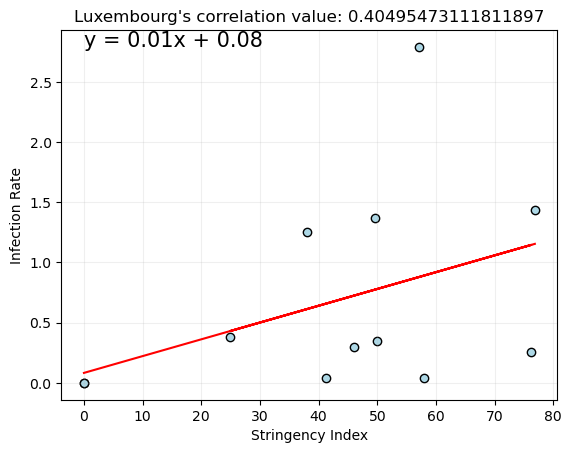

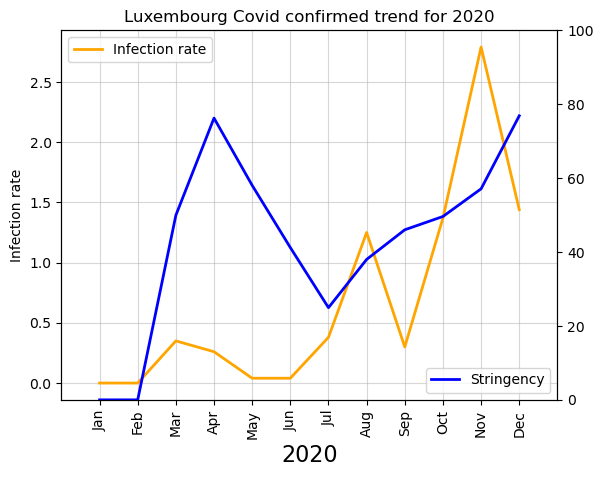

The correlation coefficient of South Korea is : 0.28652674598176986


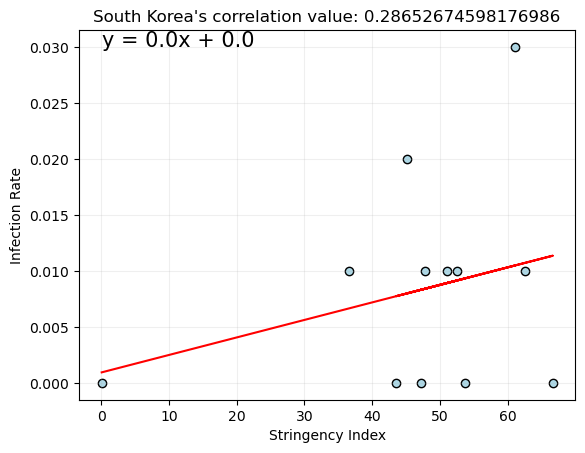

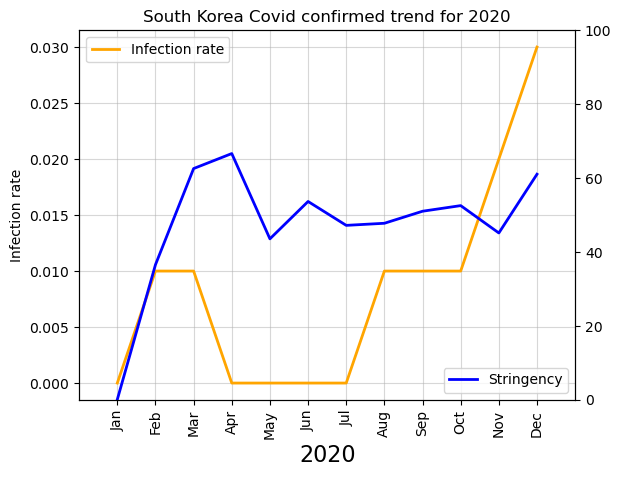

The correlation coefficient of Finland is : 0.2519000779272803


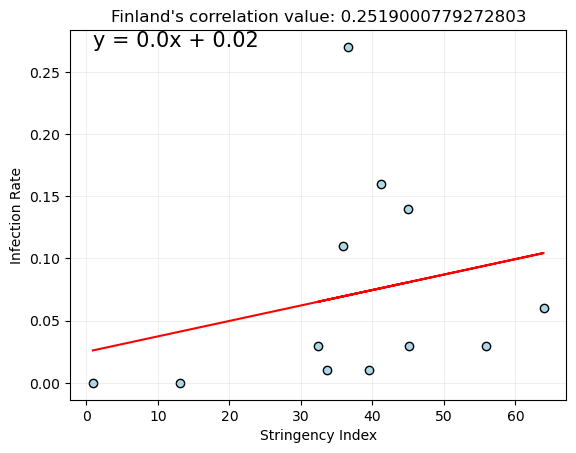

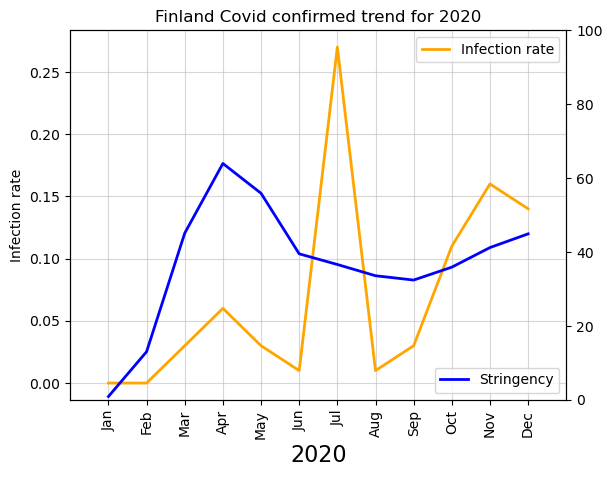

The correlation coefficient of Afghanistan is : 0.6231655530885698


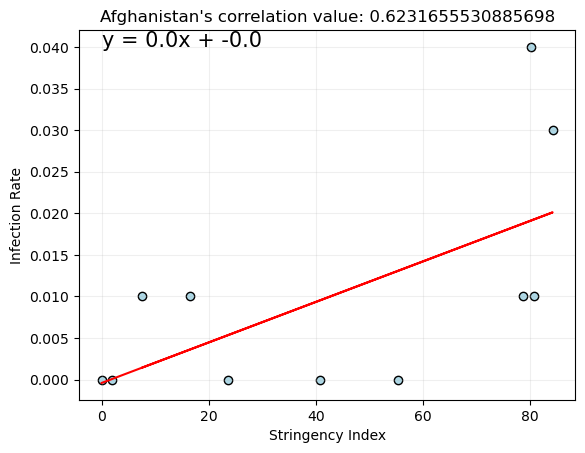

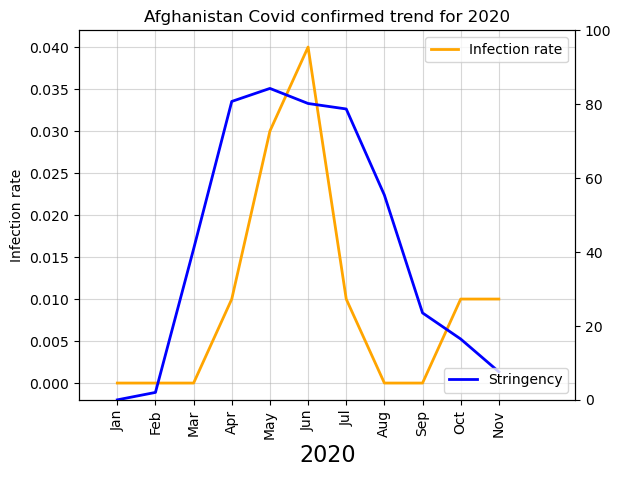

The correlation coefficient of Barbados is : 0.1327093509571045


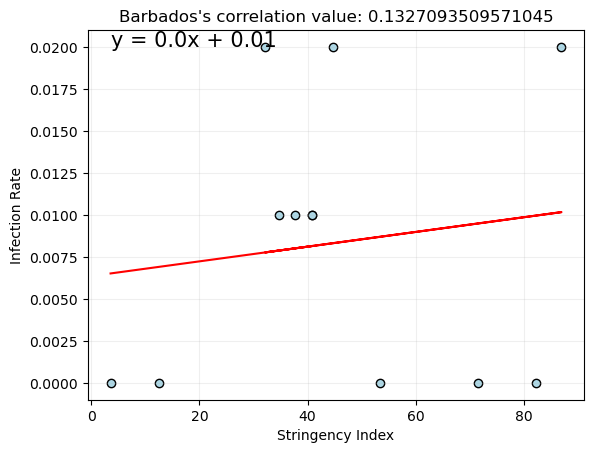

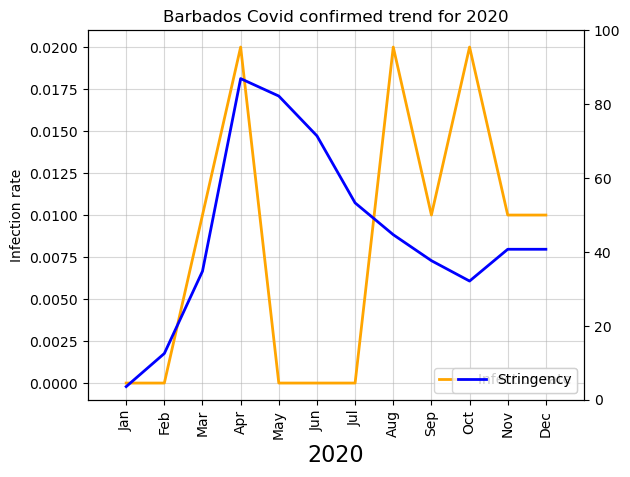

The correlation coefficient of Seychelles is : -0.2624689841491885


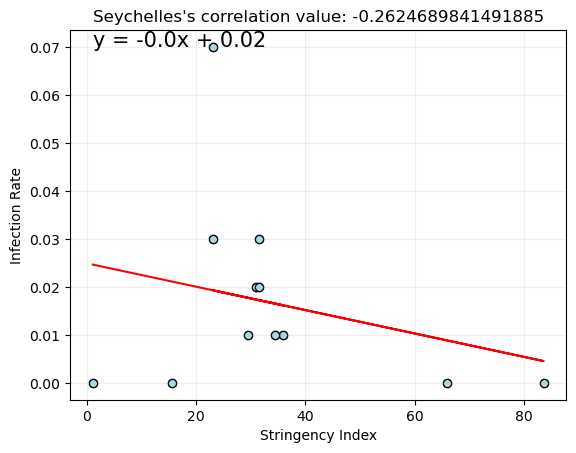

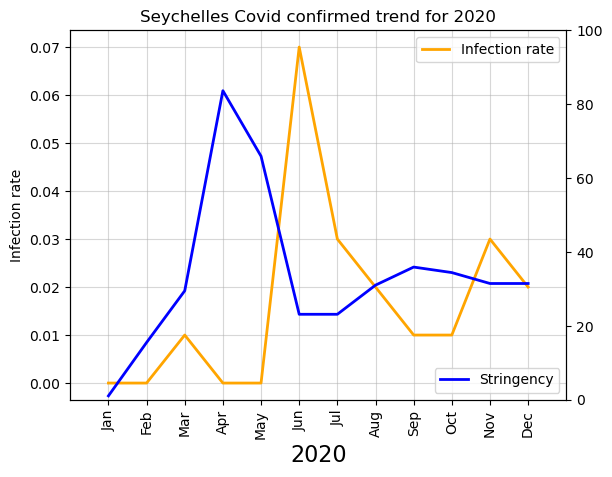

The correlation coefficient of Monaco is : 0.597144360409488


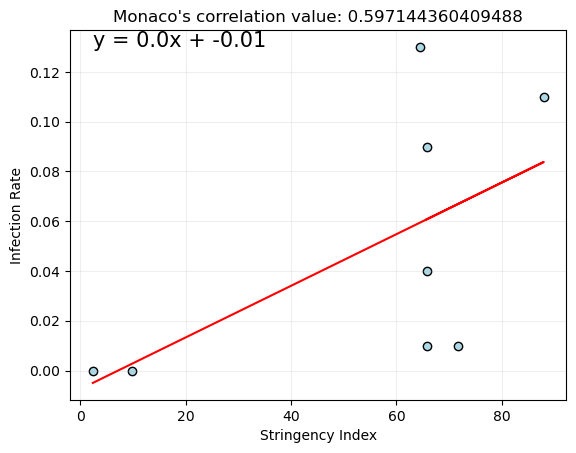

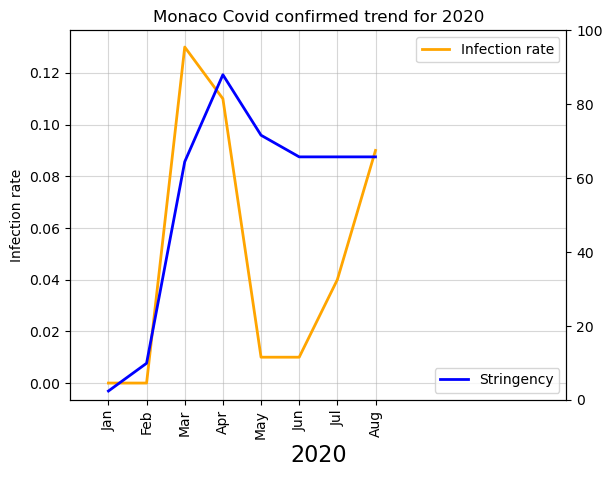

The correlation coefficient of Brunei Darussalam is : 0.030693509513952354


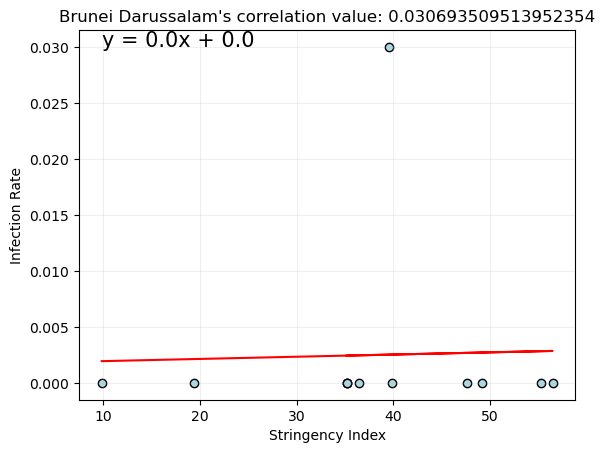

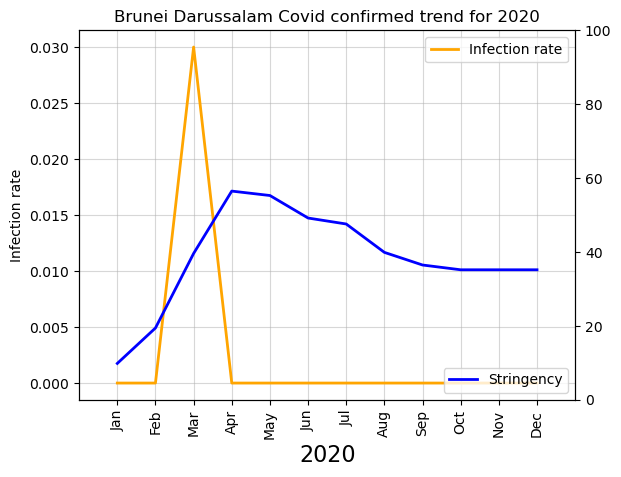

The correlation coefficient of Dominica is : -0.09717922099586712


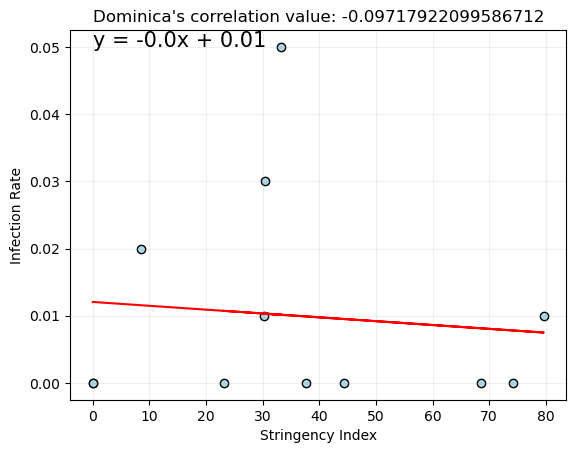

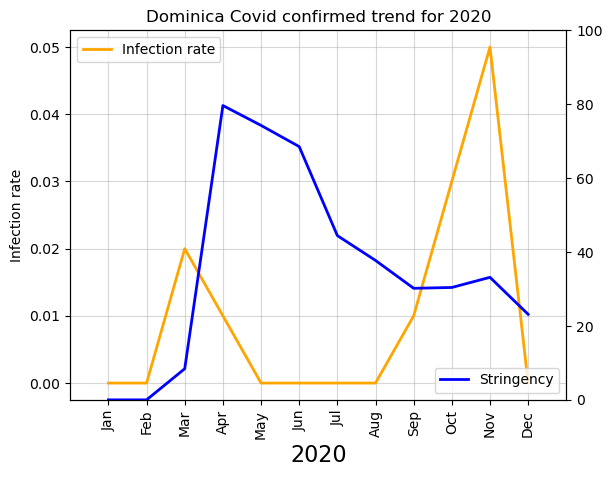

The correlation coefficient of Fiji is : 0.0


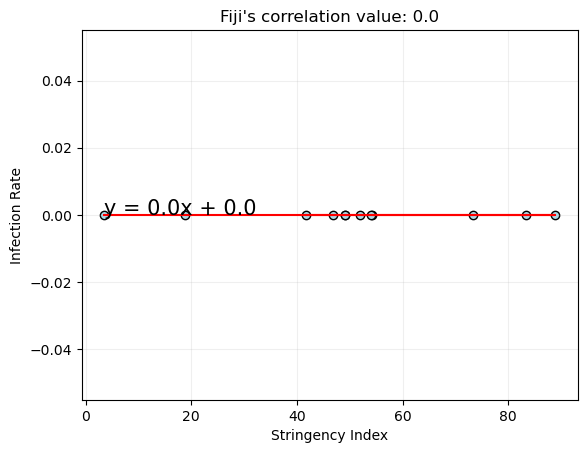

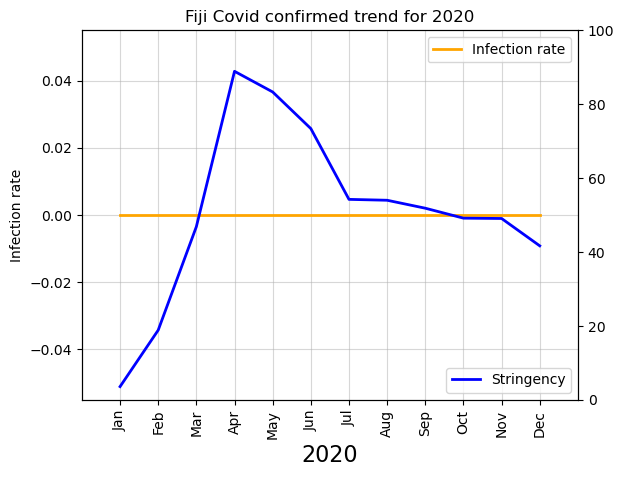

The correlation coefficient of Laos is : 0.0


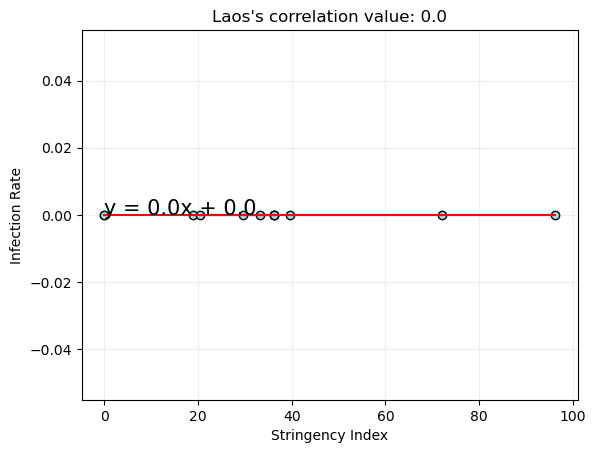

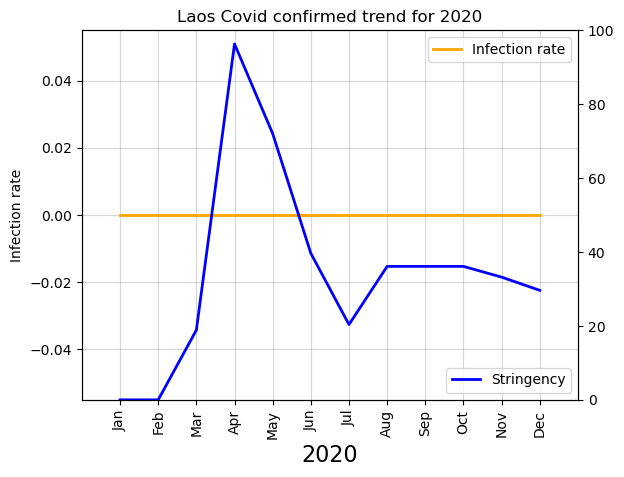

The correlation coefficient of Timor-Leste is : 0.0


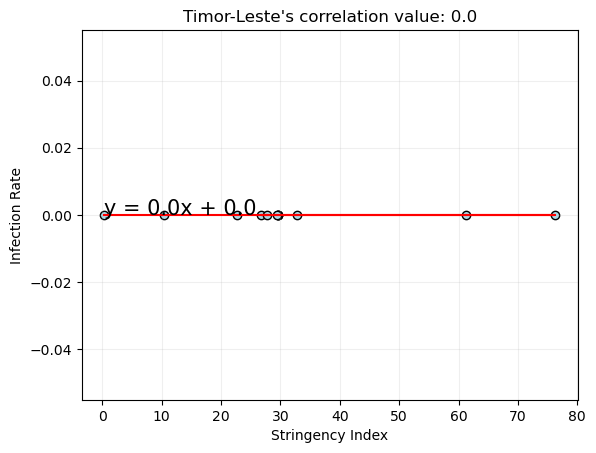

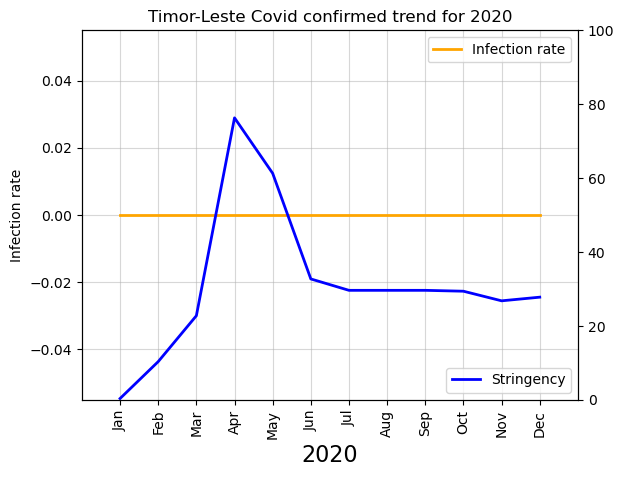

The correlation coefficient of Solomon Islands is : 0.0


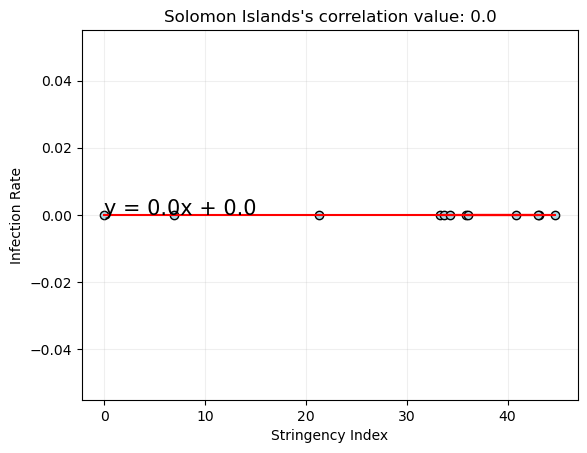

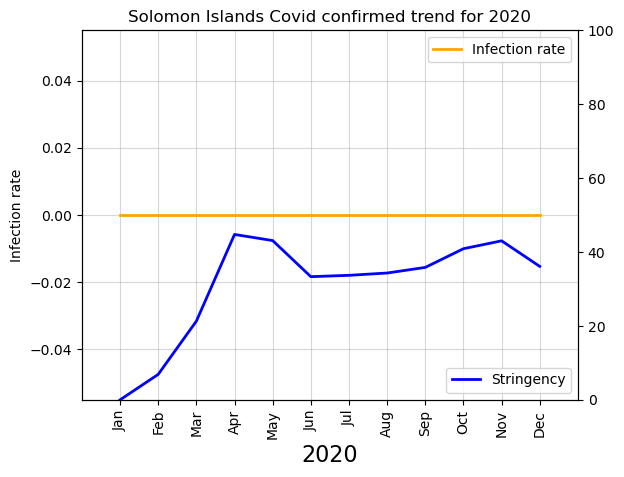

The correlation coefficient of Vanuatu is : 0.0


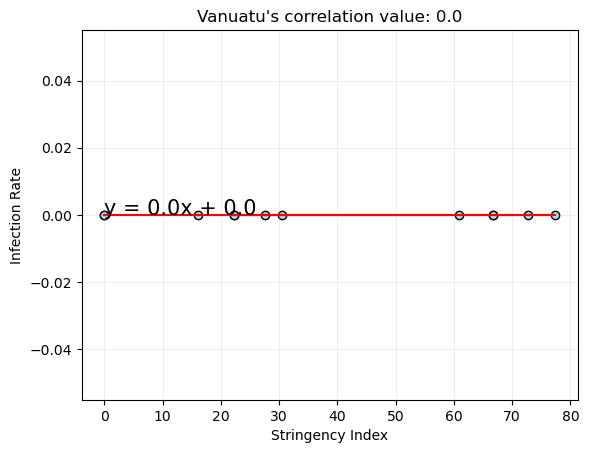

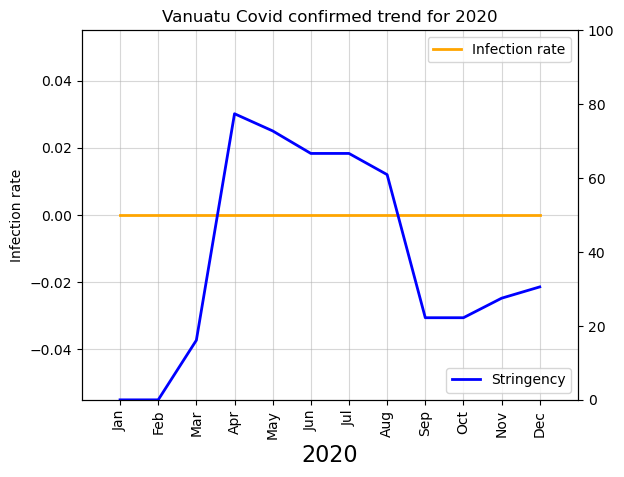

In [144]:
for i in range(len(sample)):
    country = sample.iloc[i,0]
#     line_plots(country)
    ln_rg_country(country)
    line_plots(country)

In [81]:
import matplotlib
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

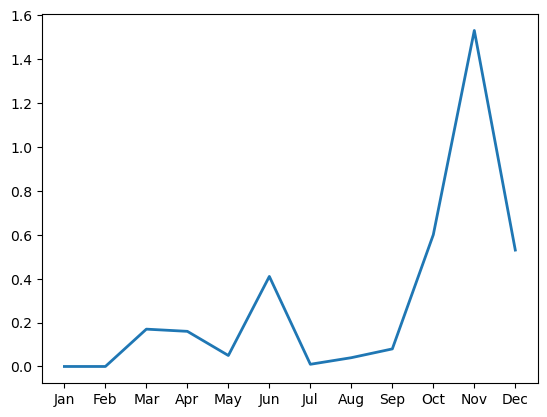

In [98]:
fig = plt.figure()
axis = plt.axes() 
x,y = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], list(ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == "Italy"].str.rstrip('%').astype('float'))

line, = axis.plot(x, y, lw = 2) 
# def init():  
#     line.set_data([], [])  
#     return line, 

def animate(i):  

    line.set_data(x, y)  
      
    return line,

ani = FuncAnimation(fig, animate)
# plt.plot(x,y)
# ani
plt.show()

In [99]:
HTML(ani.to_html5_video())

In [84]:
ani._repr_html_() is None

True

In [95]:
rc('animation', html='html5')

In [96]:
ani